# A graph matching method based on the leading Eigen vector and Sinkhorn-Knopp algorithm

# Author : Romain Raveaux (romain.raveaux@univ-tours.fr)
# Web site : http://romain.raveaux.free.fr


The following text is better displayed in the PDF file : http://romain.raveaux.free.fr/document/AroundGraphMatchingRelaxedAndRefined.pdf

## The graph matching problem
The objective of graph matching is to find correspondences between two attributed graphs $G_1$ and $G_2$. A solution of graph matching is defined as a subset of possible
correspondences $\mathcal{Y} \subseteq V_1 \times V_2$, represented by a binary assignment matrix $Y \in \{0,1 \}^{n1 \times n2}$, where $n1$ and $n2$ denote the number of nodes in $G_1$ and $G_2$, respectively. If $u_i \in V_1$ matches $v_k \in V_2$, then $Y_{i,k}=1$, and $Y_{i,k}=0$ otherwise. We
denote by $y\in \{0,1 \}^{n1 . n2}$, a column-wise vectorized replica of $Y$. With this notation, graph matching problems can be expressed as finding the assignment vector $y^*$ that maximizes a score function $S(G_1, G_2, y)$ as follows:
 
 \begin{align}
    y^* =& \underset{y} {\mathrm{argmax}} \quad S(G_1, G_2, y)\\
    \text{subject to}\quad & y \in \{0, 1\}^{n1.n2} \\
    &\sum_{i=1}^{n1} y_{i,k} \leq 1 \quad \forall k \in [1, \cdots, n2]\\
     &\sum_{k=1}^{n2} y_{i,k} \leq 1 \quad \forall i \in [1, \cdots, n1]
 \end{align}

where equations \eqref{eq:subgmgmc},\eqref{eq:subgmgmd} induces the matching constraints, thus making $y$ an assignment vector.

The function $S(G_1, G_2, y)$ measures the similarity of graph attributes, and is typically decomposed into a first order dissimilarity function $s(u_i,v_k)$ for a node pair $u_{i} \in V_1$ and $v_k \in V_2$, and a second-order similarity function $s(e_{ij},e_{kl})$ for an edge pair $e_{ij} \in E_1$ and $e_{kl} \in E_2$. Thus, the objective function of graph matching is defined as: 
  \begin{equation}
  \begin{aligned}
  S(G_1,G_2,y) =&	\sum_{i=1}^{n1} \sum_{k=1}^{n2} s(u_i,v_k)  \cdot y_{i,k} + \sum_{i=1}^{n1} \sum_{j=1}^{n1} \sum_{k=1}^{n2} \sum_{l=1}^{n2} s(e_{ij},e_{kl})\cdot y_{ik} \cdot y_{jl}\\
  =&	 \sum_{i=1}^{n1} \sum_{j=1}^{n1} \sum_{k=1}^{n2} \sum_{l=1}^{n2} K_{ik,jl}\cdot y_{ik} \cdot y_{jl}\\
  \quad \quad \quad \quad  =&y^TKy  
    \end{aligned}
\end{equation}
 
Similarity functions are usually represented by a symmetric similarity matrix $K \in \mathbb{R}^{n1n2 \times n1n2}$. A non-diagonal element $K_{ik,jl} = s(e_{ij},e_{kl})$ contains the edge similarity and a diagonal term $K_{ik,ik} = s(u_i,v_k)$  represents the vertex similarity. $K$ is called an affinity matrix or compatibility matrix. In this representation, $K_{ij,kl}=0$ means an impossible matching or a very dissimilar matching.
In essence, the score accumulates all the similarity values that are relevant to the assignment. 
The formulation in Problem \ref{model:iqpsubgm} is referred to as an integer
quadratic programming. This integer
quadratic programming expresses the quadratic
assignment problem, which is known to be NP-hard.

## Relaxed graph matching problem
The NP-hard graph matching problem is relaxed by dropping both the binary and the mapping constraints.
The model to be solved is then:

  \begin{equation}
  \begin{aligned}
    y^* =& \underset{y} {\mathrm{argmax}} \quad y^TKy     
    \end{aligned}
  \end{equation}
  \begin{align}
    \text{subject to}\quad & y \in [0,1]^ {\vert V_1 \vert \cdot \vert V_2 \vert }\\
    %\label{eq:subgmgmc}
    &\Vert y \Vert_2 =1
%    & \sqrt{\sum_{i=1}^{\vert V_1 \vert} \sum_{k=1}^{\vert V_2 \vert} (y_{i,k})^2} = 1 
  \end{align}


## Solving the relaxed graph matching problem

The optimal $y^*$ is then given by the leading eigenvector of the matrix $K$. 

### Eigen vectors
First, we need to find the eigen values $\lambda$ such that : 
\begin{equation}
P=\vert K - \lambda I \vert
\end{equation}
Setting the polynomial (P) equal to zero: $P=0$. The polynomial has roots at $\lambda_i \quad \forall i \in [1, \cdots, n1.n2]$. $\lambda_i$ are the two eigenvalues of K.
The eigenvectors corresponding to each eigenvalue can be found by solving for the components of v in the equation:
\begin{equation}
(K - \lambda I)m_i=0 \quad \forall i \in [1, \cdots, n1.n2]
\end{equation}
The eigenvector associated to the highest eigenvalue is the solution of the Problem \ref{model:relaxedQAPK}.
\begin{equation}
k^*= arg \max_{k \in [1, \cdots, n1.n2 ] } \lambda_k
\end{equation}

\begin{equation}
y^* = m_{k^*} 
\end{equation}

### Power iteration
Computing the leading eigenvector $y^*$ of the affinity matrix $K$ can be done using power iterations.
\begin{equation}
m^{(k+1)}=\frac{K m^{(k)}}{\Vert K m^{(k)} \Vert_2}
\end{equation}
$m_0 =1$ is initialize to 1. $N$ iterations are run to output the vector $y^* =m^{(N)}$.

The time complexity of this algorithm per power iteration is $O(n1^2.n2^2)$ when the matrix K is dense.

## Refined the relaxed graph matching problem
The solution $y^*$ of the relaxed graph matching problem (Problem \ref{model:relaxedQAPK}) is reshaped to become a matrix $Y^* \in \mathbb{R}^{n1 \times n2}$. Then, the matrix $Y^*$ is modified to become a doubly stochastic matrix. In the graph matching context, this modification represents the adding of the one-to-one mapping constraints (L1 constraints) $\forall k, \sum_{i} y_{ik} = 1$ and $\forall i, \sum_{k} y_{ik} = 1$. The transformation of the matrix $Y^*$ to a doubly stochastic matrix is performed by the Sinkhorn-Knopp algorithm: Starting with $M^{(0)}=Y^*$.
$$M^{(k+1)}=M_k[1_{n1}^TM^{(k)}]^{-1}$$
$$M^{(k+2)}=[M^{(k+1)}1_{n2}]^{-1}M^{(k+1)}$$
$$M^{(k+1)}_{i,j}=\frac{M^{(k)}_{i,j}}{\sum_j M^{(k)}_{i,j}} \quad \forall i \in [1, \cdots, n1]$$
$$M^{(k+2)}_{i,j}=\frac{M^{(k+1)}_{i,j}}{\sum_i M^{(k+1)}_{i,j}} \quad \forall j \in [1, \cdots, n2]$$
With : $1_{n1} \in {1}^{n1 \times 1}$ and $1_{n2} \in {1}^{n2 \times 1}$.



# Let's code !

1. Read two graphs
2. Define the similarity functions
3. Compute the similarity matrix $K$
4. Compute the matching by Eigenvector
5. Compute the matching by Power Iteration
6. Refine the matching by the Sinkhorn-Knopp algorithm


# Install requirements
*   [Networkx](https://networkx.github.io/)
Networkx to handle graphs.
Run the folowing command to install it : 
!pip install networkx


# Read the graphs
1. Datasets and functions to read data are taken from http://gmprdia.univ-lr.fr/

## Download Data

### Letter Database

Graphs that represent distorted letter drawings. They consider the 15 capital letters of the Roman alphabet that consist of straight lines only (A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z). Each node is labeled with a two-dimensional attribute giving its position relative to a reference coordinate system. Edges are unlabeled. The graph database consists of a training set, a validation set, and a test set of size 750 each. Also, three levels of distortions are provided.

This dataset is part of [IAM Graph Database Repository](http://www.fki.inf.unibe.ch/databases/iam-graph-database) and it is also linked in the [IAPR TC15 resources](https://iapr-tc15.greyc.fr/links.html).

It can be considered as a **TOY EXAMPLE** for graph classification.

> Riesen, K. and Bunke, H.: [IAM Graph Database Repository for Graph Based Pattern Recognition and Machine Learning.](https://link.springer.com/chapter/10.1007/978-3-540-89689-0_33) In: da Vitora Lobo, N. et al. (Eds.), SSPR&SPR 2008, LNCS, vol. 5342, pp. 287-297, 2008.


In [1]:
!wget https://iapr-tc15.greyc.fr/IAM/Letter.zip
!unzip Letter.zip

'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
'unzip' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


## Prepare data reader

IAM graphs are provided as a GXL file:


```
<gxl>
  <graph id="GRAPH_ID" edgeids="false" edgemode="undirected">
    <node id="_0">
      <attr name="x">
        <float>0.812867</float>
      </attr>
      <attr name="y">
        <float>0.630453</float>
      </attr>
    </node>
    ...
    <node id="_N">
      ...
    </node>
    <edge from="_0" to="_1"/>
    ...
    <edge from="_M" to="_N"/>
  </graph>
</gxl>
```

# Some imports

In [2]:
import numpy as np
import xml.etree.ElementTree as ET
import networkx as nx
import os
import matplotlib.pyplot as plt
%matplotlib inline  

### Read a graph

In [3]:

def read_letters(file):
  """Parse GXL file and returns a networkx graph
  """
  
  tree_gxl = ET.parse(file)
  root_gxl = tree_gxl.getroot()
  node_label = {}
  node_id = []
  
  # Parse nodes
  for i, node in enumerate(root_gxl.iter('node')):
    node_id += [node.get('id')]
    for attr in node.iter('attr'):
      if (attr.get('name') == 'x'):
        x = float(attr.find('float').text)
      elif (attr.get('name') == 'y'):
        y = float(attr.find('float').text)
    node_label[i] = [x, y]

  node_id = np.array(node_id)

  # Create adjacency matrix
  am = np.zeros((len(node_id), len(node_id)))
  for edge in root_gxl.iter('edge'):
    s = np.where(node_id==edge.get('from'))[0][0]
    t = np.where(node_id==edge.get('to'))[0][0]

    # Undirected Graph
    am[s,t] = 1
    am[t,s] = 1

  # Create the networkx graph
  G = nx.from_numpy_matrix(am)
  nx.set_node_attributes(G, node_label, 'position')
  
  return G


## Load Data with NetworkX
### We load 2 graphs  and we display them


[0, 1, 2, 3, 4]


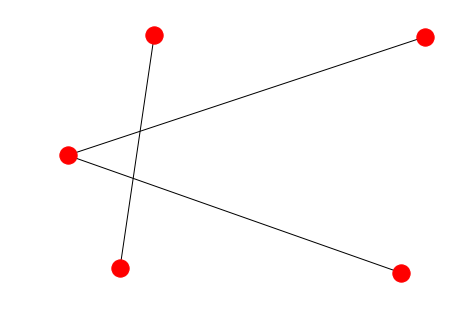

[0, 1, 2, 3, 4, 5]


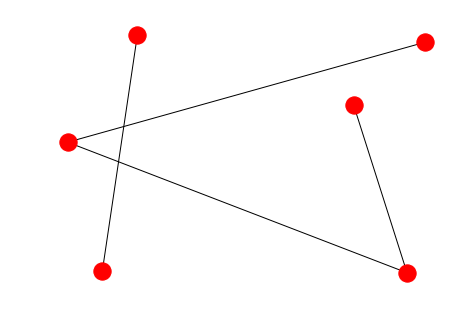

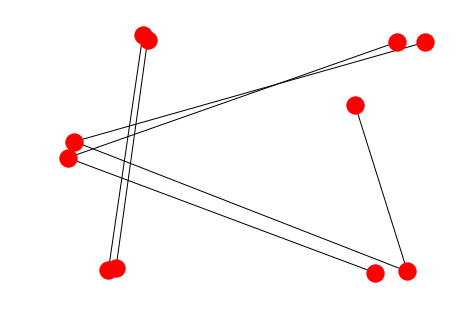

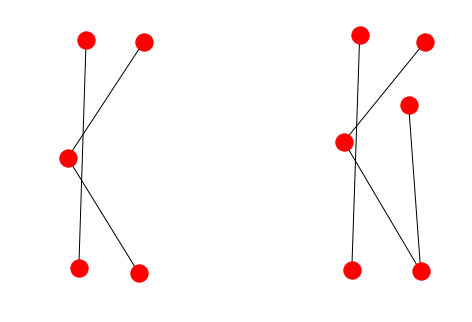

In [4]:

# Select distortion [LOW, MED, HIGH]
distortion = 'LOW'

# Select letter [A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z]
letter = 'K'

# Select id [0-149]
id=50

# Read the graph and draw it using networkx tools
G1 = read_letters(os.path.join('Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
print(G1.nodes)
nx.draw(G1, pos=dict(G1.nodes(data='position')))
plt.show()


id=70#52#100

# Read the graph and draw it using networkx tools
G2 = read_letters(os.path.join('Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
print(G2.nodes)
nx.draw(G2, pos=dict(G2.nodes(data='position')))
plt.show()

n1=G1.number_of_nodes()
G1G2=nx.disjoint_union(G1,G2)
nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
plt.show()

for i in range(n1,G1G2.number_of_nodes()):
    G1G2.node[i]['position']=[G1G2.node[i]['position'][0]+5,G1G2.node[i]['position'][1]]

nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
plt.show()

# Similarity functions 

First, we extract node features and ajacency matrix.  
## Nodes features and adjacency matrix

In [5]:
def ExtractNodeFeaturesAndAdjacencyMatrix(G):
    
    nodelist, nodes = map(list, zip(*G.nodes(data='position')))
    GnodesFeatures = np.array(nodes)
    Gadjacency = np.array(nx.adjacency_matrix(G, nodelist=nodelist).todense())
    
    return GnodesFeatures,Gadjacency


print("Printing the first node")
print(G1.nodes[0])
print("Printing the edges : they have no attributes")
print(G1.edges)
print("Printing the nodes attributes")
print(G1.nodes(data='position'))
G1nodesFeatures,G1adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G1)
print(G1nodesFeatures.shape)
print(G1nodesFeatures)
print(G1adjacency)
    
G2nodesFeatures,G2adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G2)


Printing the first node
{'position': [0.820072, 2.79737]}
Printing the edges : they have no attributes
[(0, 2), (1, 3), (3, 4)]
Printing the nodes attributes
[(0, [0.820072, 2.79737]), (1, [1.8672, 2.77828]), (2, [0.687186, 0.662841]), (3, [0.4846, 1.69377]), (4, [1.77495, 0.617234])]
(5, 2)
[[ 0.820072  2.79737 ]
 [ 1.8672    2.77828 ]
 [ 0.687186  0.662841]
 [ 0.4846    1.69377 ]
 [ 1.77495   0.617234]]
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]]


### Node Similarity
Let us see if we use the scalar product as a similarity measure. 

(5, 2)
(6, 2)
(5, 6)
[[  8.61538968   9.38898745   2.33429181   5.58328118   3.32868062
    7.51552174]
 [  9.39881547  11.4122143    3.00823333   6.08520383   5.3166684
    9.24348541]
 [  2.43574315   3.20197497   0.87610066   1.57579762   1.73011509
    2.61383123]
 [  5.20694832   5.66122662   1.40555615   3.37447555   1.9926611
    4.53036292]
 [  3.176231     5.23218594   1.55963864   2.04962799   3.77901192
    4.35237244]]
[1 1 1 1 1]


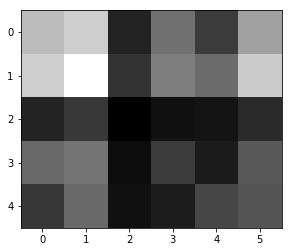

In [6]:
print(G1nodesFeatures.shape)
print(G2nodesFeatures.shape)
NodeSimilarity=G1nodesFeatures.dot(G2nodesFeatures.T)
print(NodeSimilarity.shape)
print(NodeSimilarity)
print(NodeSimilarity.argmax(axis=1))
plt.imshow(NodeSimilarity,cmap="gray")

Scalar product is not very convenient to match nodes. Let us try an Eucliedean distance. 
### Node dissimilarity

(5, 6)
[[ 0.05193004  1.16290126  2.16131149  1.00016256  2.42599171  1.06042863]
 [ 1.06926317  0.11560375  2.45578153  1.64437175  2.14870631  0.61323742]
 [ 2.18535479  2.47793262  0.03788728  1.19544052  1.22325492  1.82802508]
 [ 1.19393317  1.84763577  1.06519277  0.15438061  1.77858702  1.3041179 ]
 [ 2.43200378  2.16784932  1.1199116   1.76103942  0.13565203  1.57620931]]
[0 1 2 3 4]


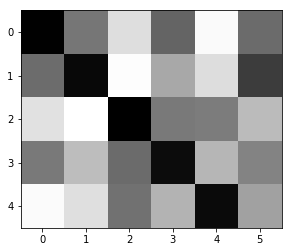

In [7]:
def distance_matrix_np(set1,set2):
    dm=np.zeros((set1.shape[0],set2.shape[0]))
    for i in range(set1.shape[0]):
        for j in range(set2.shape[0]):
            dm[i,j]=np.linalg.norm((set1[i,:]-set2[j,:]),2)
    return dm
    """Returns matrix of pairwise Euclidean distances. Vectorized numpy version."""
    #return np.sum((set1[None,:] - set2[:, None])**2, -1)**0.5

NodeDisSimilarity=distance_matrix_np(G1nodesFeatures,G2nodesFeatures)
print(NodeDisSimilarity.shape)
print(NodeDisSimilarity)
print(NodeDisSimilarity.argmin(axis=1))
plt.imshow(NodeDisSimilarity,cmap="gray")

### Node Similarity from dissimilarity
The Eucleudean distance is quite efficient to discriminate between nodes.
Let us chance the dissimilarity into a similarity. s = cst - d


[[ 9.94806996  8.83709874  7.83868851  8.99983744  7.57400829  8.93957137]
 [ 8.93073683  9.88439625  7.54421847  8.35562825  7.85129369  9.38676258]
 [ 7.81464521  7.52206738  9.96211272  8.80455948  8.77674508  8.17197492]
 [ 8.80606683  8.15236423  8.93480723  9.84561939  8.22141298  8.6958821 ]
 [ 7.56799622  7.83215068  8.8800884   8.23896058  9.86434797  8.42379069]]
[0 1 2 3 4]


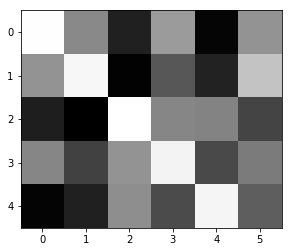

In [8]:
cst=10
NodeSimilarity=cst-NodeDisSimilarity
print(NodeSimilarity)
print(NodeSimilarity.argmax(axis=1))
plt.imshow(NodeSimilarity,cmap="gray")

### Let us build K  with 4 "for" loops

(30, 30)
[[  9.94806996  10.           0.          10.          10.          10.
   10.          10.           0.          10.          10.          10.
    0.           0.          10.           0.           0.           0.
   10.          10.           0.          10.          10.          10.
   10.          10.           0.          10.          10.          10.        ]
 [ 10.           8.83709874  10.           0.          10.          10.
   10.          10.          10.           0.          10.          10.
    0.           0.           0.          10.           0.           0.
   10.          10.          10.           0.          10.          10.
   10.          10.          10.           0.          10.          10.        ]
 [  0.          10.           7.83868851  10.          10.          10.
    0.          10.          10.          10.          10.          10.
   10.           0.           0.           0.           0.           0.
    0.          10.          10.     

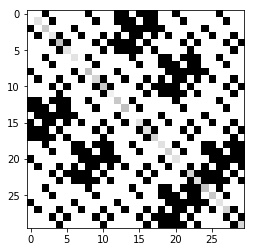

In [9]:
def BuildKv1(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency):
    n1=G1nodesFeatures.shape[0]
    n2=G2nodesFeatures.shape[0]
    cst=10
    K = np.zeros((n1*n2,n1*n2))
    print(K.shape)
    ik=-1
    for i in range(n1):
        for k in range(n2):
            ik+=1
            jl=-1
            for j in range(n1):
                for l in range(n2):
                    jl+=1
                    if i==j and k==l :
                        feature1 = G1nodesFeatures[i]
                        feature2 = G2nodesFeatures[k]
                        #sim=feature1.dot(feature2.T)
                        d=np.linalg.norm((feature1-feature2),2)
                        K[ik,jl]=cst-d
                    else:
                        e1=G1adjacency[i,j]
                        e2=G2adjacency[k,l]
                        if e1==e2:
                            K[ik,jl]=cst
                        else:
                            K[ik,jl]=0

    return K

    
K=BuildKv1(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency)
print(K)   
plt.imshow(K,cmap="gray")

A more complex/richer version of K can be computed. exp(-d) : Exponentional function (between ]-inf,0]) of minus a distance is similarity function between 0 and 1.

[[ 0.98258351  0.04598493  0.          0.04598493  0.04598493  0.04598493
   0.04598493  0.11130346  0.          0.12414994  0.07017473  0.11868066
   0.          0.          0.12115251  0.          0.          0.
   0.04598493  0.12173685  0.          0.11330487  0.07324667  0.11981608
   0.04598493  0.07564966  0.          0.07118905  0.12016632  0.07314313]
 [ 0.04598493  0.71108592  0.04598493  0.          0.04598493  0.04598493
   0.11130346  0.04598493  0.06977068  0.          0.07490818  0.08579574
   0.          0.          0.          0.10369706  0.          0.
   0.12173685  0.04598493  0.07278232  0.          0.07870637  0.08100984
   0.07564966  0.04598493  0.1185997   0.          0.11330734  0.06050582]
 [ 0.          0.04598493  0.47643698  0.04598493  0.04598493  0.04598493
   0.          0.06977068  0.04598493  0.10915136  0.10595238  0.0806857
   0.12115251  0.          0.          0.          0.          0.          0.
   0.07278232  0.04598493  0.11914697  0.11530685

   0.04598493  0.04598493  0.04598493  0.04598493  0.          0.56575677]]


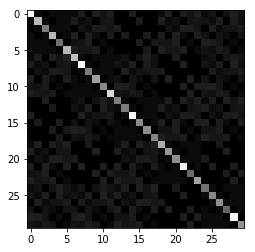

In [10]:
def BuildKv2(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency):
    n1=G1nodesFeatures.shape[0]
    n2=G2nodesFeatures.shape[0]
    K = np.zeros((n1*n2,n1*n2))
    ik=-1
    for i in range(n1):
        for k in range(n2):
            ik+=1
            jl=-1
            for j in range(n1):
                for l in range(n2):
                    jl+=1
                    if i==j and k==l :
                        feature1 = G1nodesFeatures[i]
                        feature2 = G2nodesFeatures[k]
                        d=np.linalg.norm(feature1-feature2,2)
                        d1=np.linalg.norm(feature1,2)
                        d2=np.linalg.norm(feature2,2)
                        dnorm=d/np.max([d1,d2])#(np.linalg.norm(feature1,2)+np.linalg.norm(feature2,2))
                        #sim=feature1.dot(feature2.T)
                        K[ik,jl]=np.exp(-dnorm)
                    else:
                        e1=G1adjacency[i,j]
                        e2=G2adjacency[k,l]
                        if e1==e2:
                            feature1i = G1nodesFeatures[i]
                            feature1j = G1nodesFeatures[j]
                            dij= np.linalg.norm(feature1i-feature1j,2)

                            feature2k = G2nodesFeatures[k]
                            feature2l = G2nodesFeatures[l]
                            dkl= np.linalg.norm(feature2k-feature2l,2)
                            d=np.sqrt((dij-dkl)**2)
                            dnorm=d/np.max([dij,dkl])#(dij+dkl)
                            K[ik,jl]=0.125*np.exp(-dnorm) #np.abs(dij-dkl)
                        else:
                            K[ik,jl]=0

    #print(K)  
    return K
K=BuildKv2(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency)
print(K)  
plt.imshow(K,cmap="gray")

## Graph Matching by Eigen Vector

In [11]:
def GraphMatchingEigenVector(K,n1,n2):
    eigval,eigvec = np.linalg.eig(K)
    print('Printing the eigenvalues shape')
    print(eigval.shape)
    print('Printing the eigenvalues')
    print(eigval)
    print('Printing the eigenvectors shape')
    print(eigvec.shape)
    kmax=eigval.argmax()
    print('Printing the index of the highest eigenvalues')
    print(kmax)
    #print(eigvec)
    y=eigvec[:,kmax]
    print('Printing the shape of the mapping vector')
    print(y.shape)
    Y=y.reshape((n1,n2))
    Y=np.abs(Y)
    print('Printing the node-to-node mapping matrix')
    print(Y)
    return y,Y

n1=G1nodesFeatures.shape[0]
n2=G2nodesFeatures.shape[0]
y,Y=GraphMatchingEigenVector(K,n1,n2)
print("Printing the best matching for each node of G1")
bestmatch = Y.argmax(axis=1)
print(bestmatch)
print("Computing the objective function")
res=y.T.dot(K)
obj=res.dot(y)
print("Printing the objective value. It should be equal to the highest eigenvalue")
print(obj)
print("Printing the norm of the mapping vector y. It should be equal to one")
print(np.linalg.norm(y,2))


Printing the eigenvalues shape
(30,)
Printing the eigenvalues
[ 2.11346105  1.19559549  0.020992    1.0778283   0.07655785  0.15822889
  0.95237755  0.94510598  0.89898135  0.84672651  0.82544185  0.81364578
  0.25317879  0.28232372  0.27812919  0.75304677  0.7335985   0.67957162
  0.66140537  0.64315013  0.35223116  0.37886065  0.39232336  0.40635047
  0.4355184   0.58429435  0.56603637  0.49085075  0.52218117  0.50928367]
Printing the eigenvectors shape
(30, 30)
Printing the index of the highest eigenvalues
0
Printing the shape of the mapping vector
(30,)
Printing the node-to-node mapping matrix
[[ 0.27244264  0.18829001  0.17074156  0.17281584  0.13570852  0.19209749]
 [ 0.19429716  0.25991065  0.16504857  0.15803724  0.16609783  0.20954322]
 [ 0.17592111  0.15862168  0.25280739  0.15127     0.14949076  0.16412295]
 [ 0.1573351   0.13936784  0.13320908  0.23318393  0.1275705   0.16615826]
 [ 0.15953745  0.18223976  0.17741821  0.13815441  0.23554774  0.17288698]]
Printing the best m

### Visualization of the matching

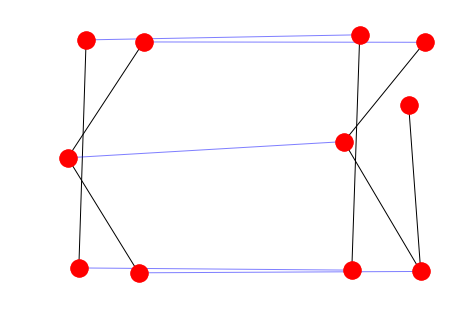

In [12]:
G1G2=nx.disjoint_union(G1,G2)
#save=G1G2.edges()
#clone=G1G2.copy()
#clone.remove_edges_from(save)
#G1G2=clone.copy()
for i in range(n1,G1G2.number_of_nodes()):
    G1G2.node[i]['position']=[G1G2.node[i]['position'][0]+5,G1G2.node[i]['position'][1]]
edgelista=[]
for i in range(n1):
    k=bestmatch[i]
    #G1G2.add_edge(i, k+n1, edge_color='r')
    edgelista.append((i, k+n1))

nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,
                       width=1, alpha=0.5, edge_color='b')
plt.show()


## Graph Matching by Power Iteration


In [13]:
def GraphMatchingPowerIteration(K,n1,n2,N):
    m=np.ones((n1*n2))
    for i in range(N):
        num=K.dot(m)
        denum=np.linalg.norm(num,2)
        res=num/denum
        m=res
    y=m
    Y=y.reshape((n1,n2))
    return y,Y

N=100
y,Y=GraphMatchingPowerIteration(K,n1,n2,N)
print('Printing the node-to-node mapping matrix')
print(Y)
print("Printing the best matching for each node of G1")
print(Y.argmax(axis=1))
print("Computing the objective function")
res=y.T.dot(K)
obj=res.dot(y)
print("Printing the objective value. It should be equal to the highest eigenvalue")
print(obj)
print("Printing the norm of the mapping vector y. It should be equal to one")
print(np.linalg.norm(y,2))



Printing the node-to-node mapping matrix
[[ 0.27244264  0.18829001  0.17074156  0.17281584  0.13570852  0.19209749]
 [ 0.19429716  0.25991065  0.16504857  0.15803724  0.16609783  0.20954322]
 [ 0.17592111  0.15862168  0.25280739  0.15127     0.14949076  0.16412295]
 [ 0.1573351   0.13936784  0.13320908  0.23318393  0.1275705   0.16615826]
 [ 0.15953745  0.18223976  0.17741821  0.13815441  0.23554774  0.17288698]]
Printing the best matching for each node of G1
[0 1 2 3 4]
Computing the objective function
Printing the objective value. It should be equal to the highest eigenvalue
2.11346104662
Printing the norm of the mapping vector y. It should be equal to one
1.0


## Refine the matching by the Sinkhorn-Knopp algorithm

In [14]:
def SinkhornKnopp(Y,N):
    M=Y.copy()
    for i in range(N):
        res=M.sum(axis=1) #sum row onen1.T.dot(M)
        Mk=np.divide(M,res[:,None])
        res=Mk.sum(axis=0)  #sum col
        #Mk2=np.divide(Mk,res[:,None].T)
        Mk2=np.divide(Mk,res[None,:])
        M=Mk2

    return M

N=10
M=SinkhornKnopp(Y,N)
print("Chekching if the columns sum to one")
print(M.sum(axis=0))
print("Chekching if the rows sum to one")
print(M.sum(axis=1))

print("Printing the best matching for each node of G1")
bestmatch = M.argmax(axis=1)
print(bestmatch)


Chekching if the columns sum to one
[ 1.  1.  1.  1.  1.  1.]
Chekching if the rows sum to one
[ 1.2  1.2  1.2  1.2  1.2]
Printing the best matching for each node of G1
[0 1 2 3 4]


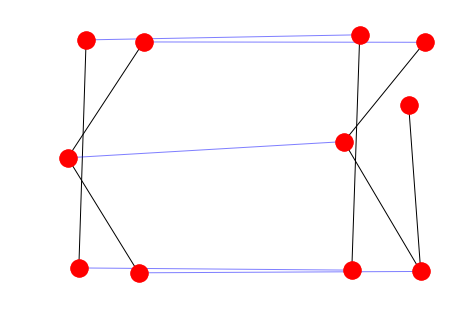

In [15]:
G1G2=nx.disjoint_union(G1,G2)
for i in range(n1,G1G2.number_of_nodes()):
    G1G2.node[i]['position']=[G1G2.node[i]['position'][0]+5,G1G2.node[i]['position'][1]]
edgelista=[]
for i in range(n1):
    k=bestmatch[i]
    edgelista.append((i, k+n1))

nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,
                       width=1, alpha=0.5, edge_color='b')
plt.show()


# Let us do some animation

In [48]:
def draw(j):
    ax.cla()
    ax.axis('off')    
    ax.set_title('Matching Graph 0 and Graph: %d' % j)
    G2 = read_letters(os.path.join('Letter', distortion, letter+'P1_'+ str(j).zfill(4) +'.gxl'))
    G2nodesFeatures,G2adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G2)
    K=BuildKv2(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency)
    
    N=100
    n1=G1nodesFeatures.shape[0]
    n2=G2nodesFeatures.shape[0]
    y,Y=GraphMatchingPowerIteration(K,n1,n2,N)
    N=10
    M=SinkhornKnopp(Y,N)
    bestmatch = M.argmax(axis=1)
    
    G1G2=nx.disjoint_union(G1,G2)
    for i in range(n1,G1G2.number_of_nodes()):
        G1G2.node[i]['position']=[G1G2.node[i]['position'][0]+5,G1G2.node[i]['position'][1]]
    edgelista=[]
    for i in range(n1):
        k=bestmatch[i]
        edgelista.append((i, k+n1))

        
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),ax=ax)
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,
                           width=1, alpha=0.5, edge_color='b',ax=ax)
    #plt.show()

# Select distortion [LOW, MED, HIGH]
distortion = 'LOW'
# Select letter [A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z]
letter = 'K'
# Select id [0-149]
id=0
# Read the graph and draw it using networkx tools
G1 = read_letters(os.path.join('Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
G1nodesFeatures,G1adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G1)
fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(0)  # draw the prediction of the first epoch
plt.close()


In [51]:
ani = animation.FuncAnimation(fig, draw, frames=149, interval=1000)
ani.save('GraphMachingLetterKLOW.mp4')
HTML(ani.to_html5_video())

# Another way to do the animation

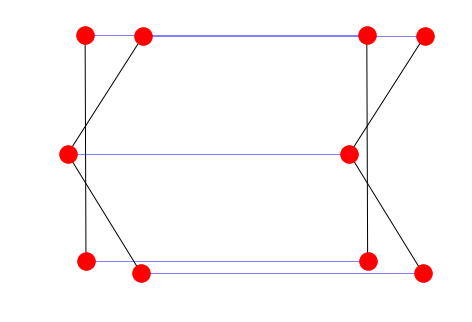

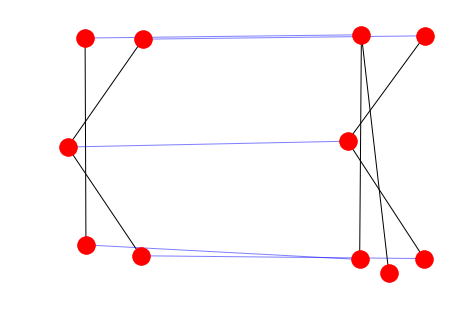

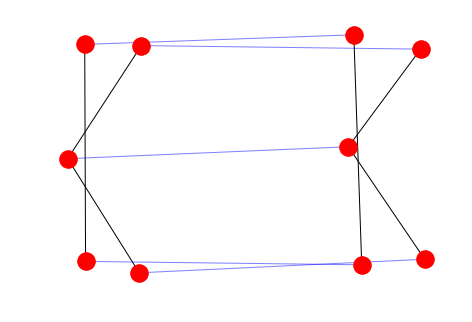

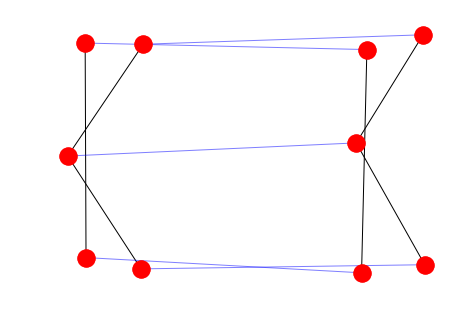

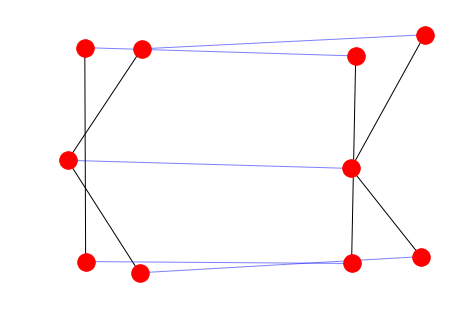

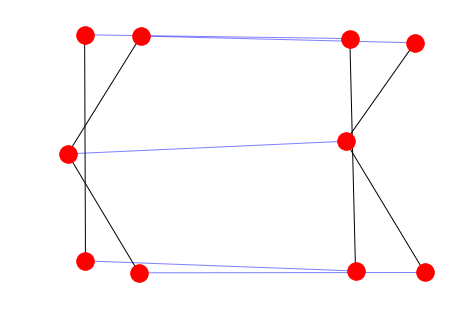

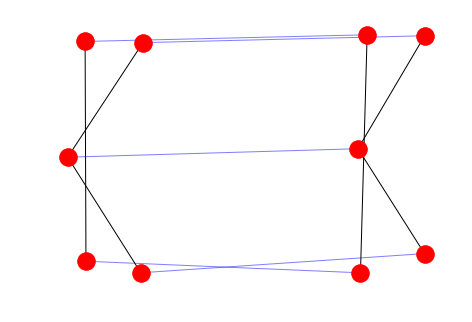

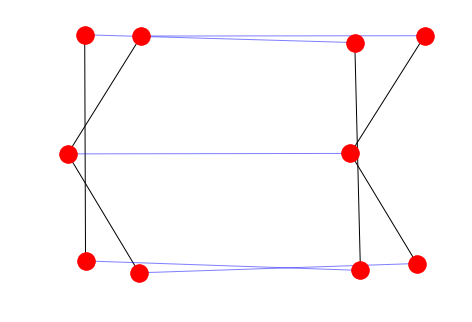

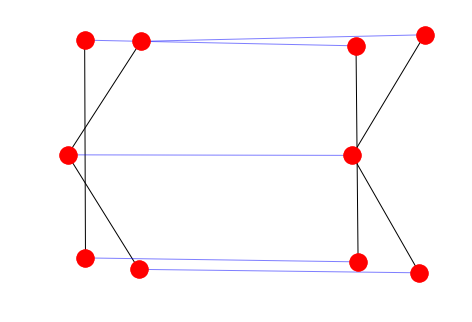

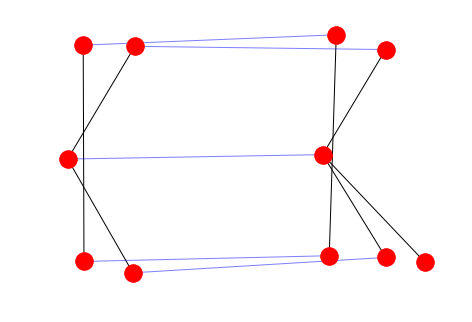

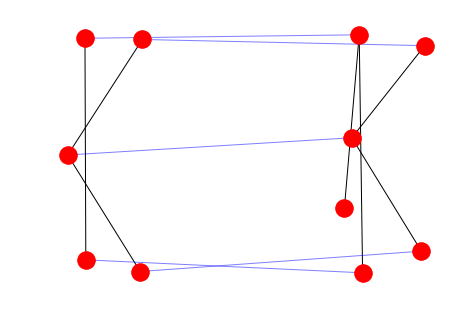

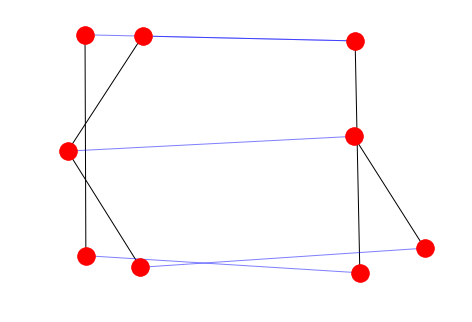

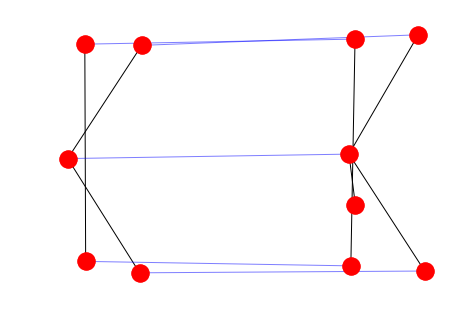

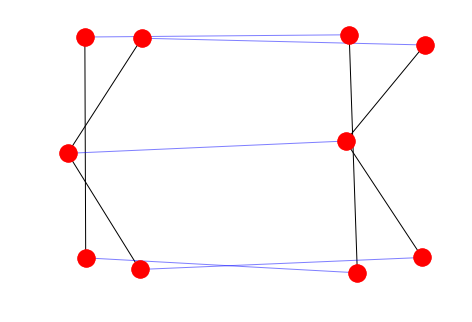

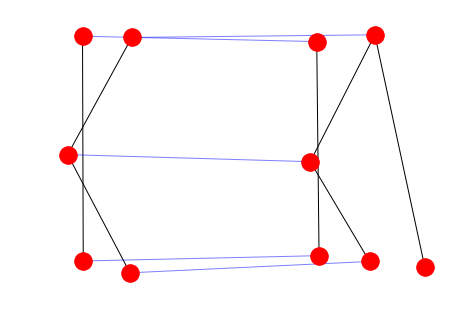

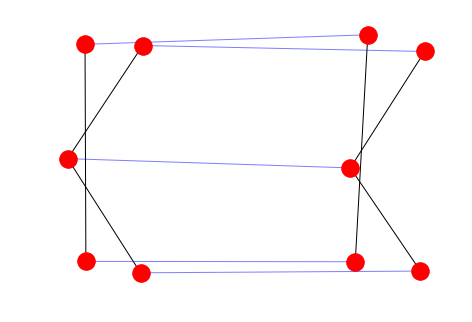

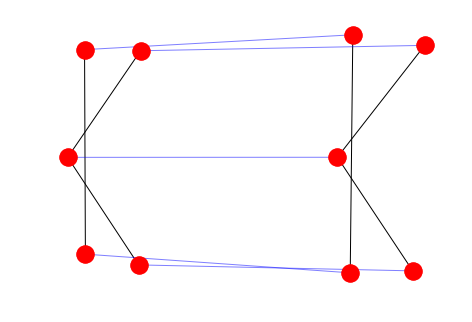

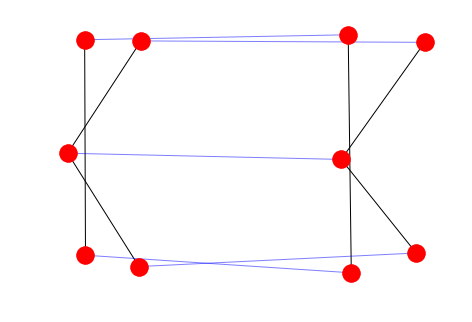

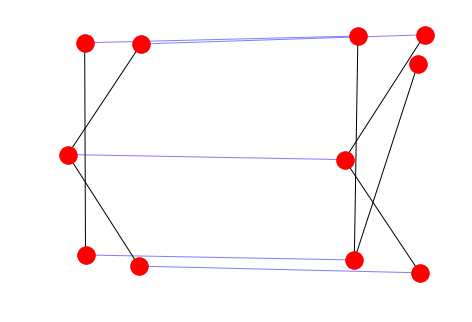

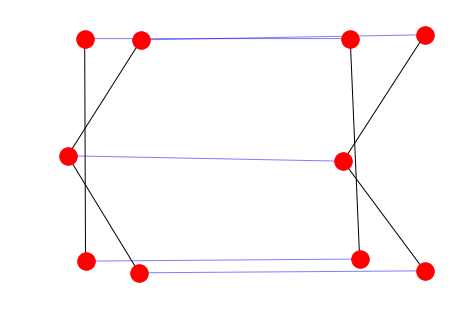

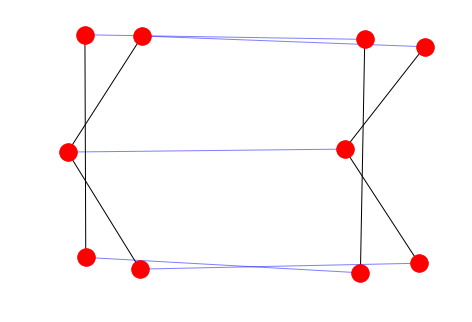

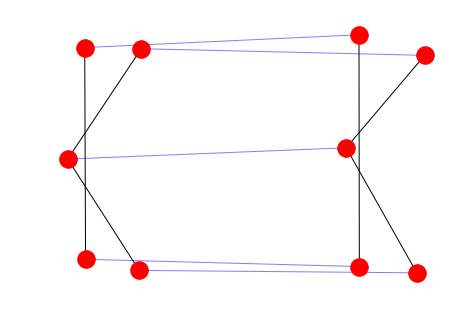

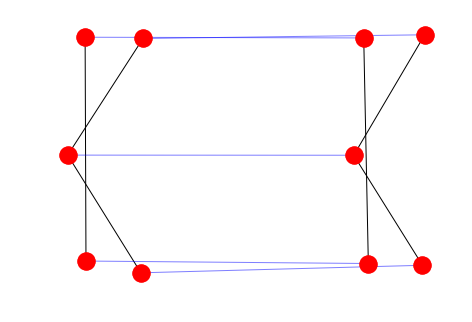

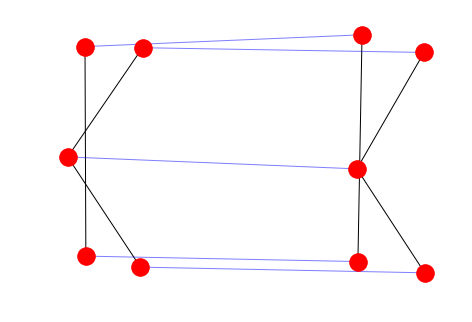

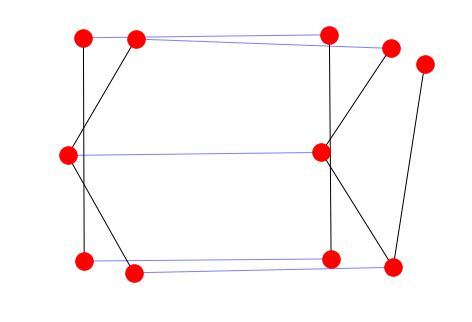

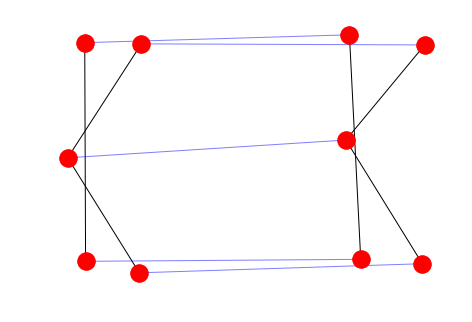

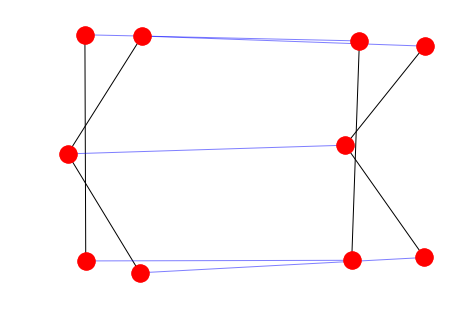

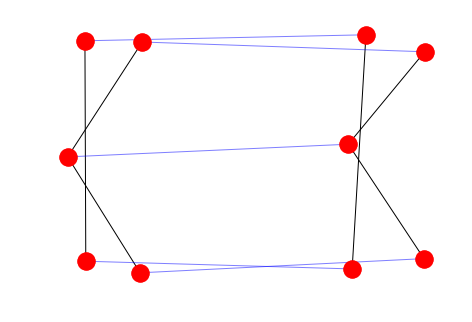

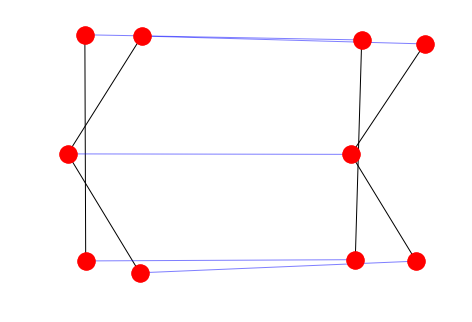

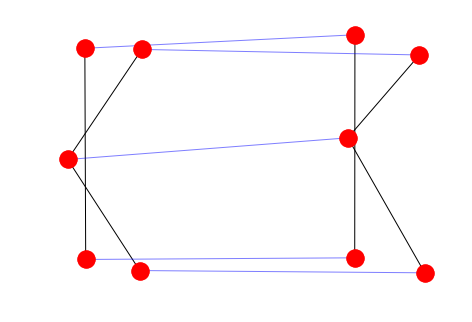

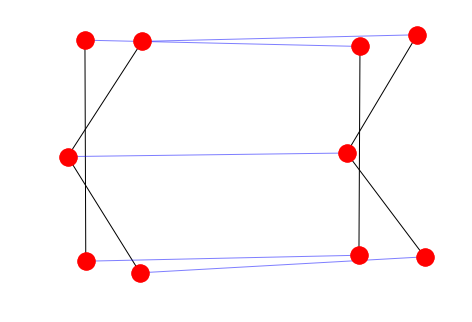

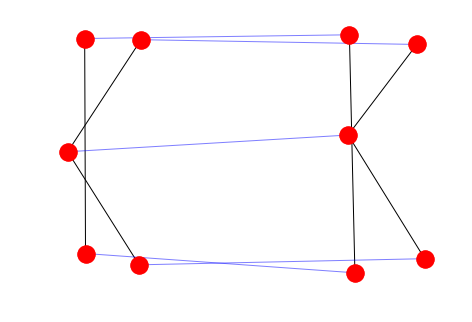

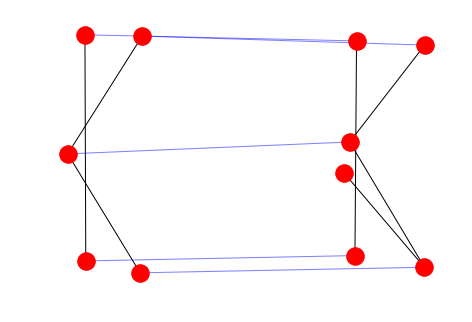

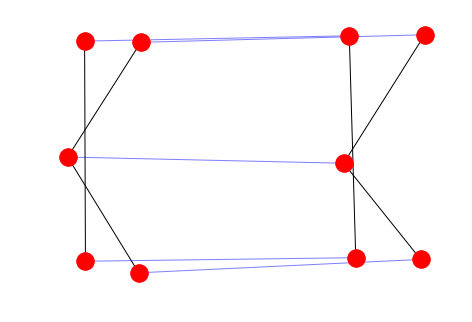

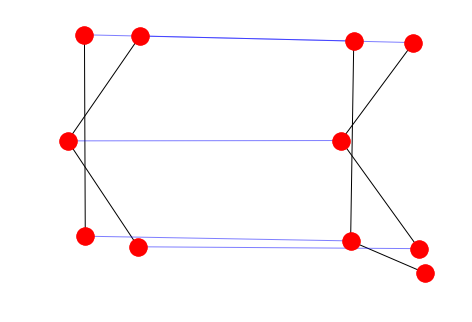

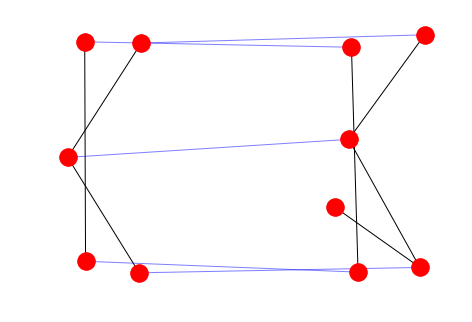

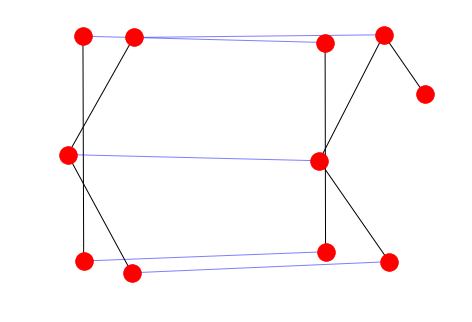

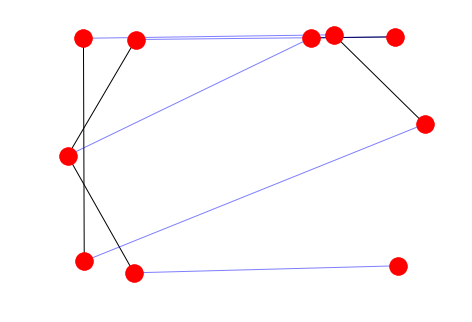

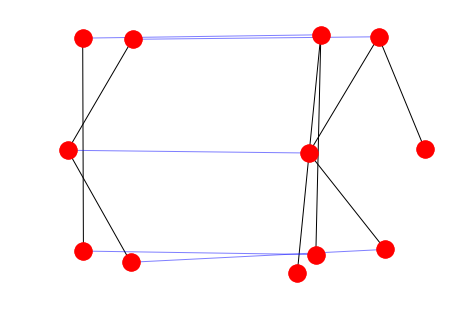

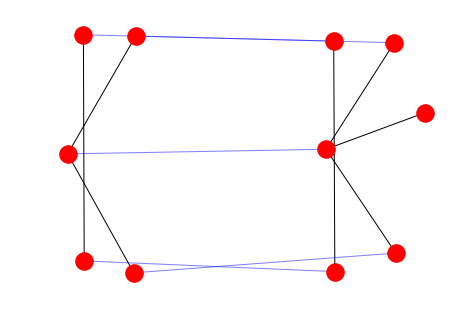

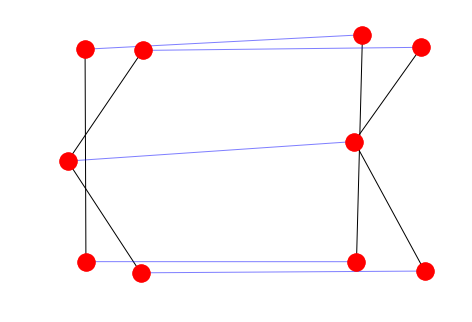

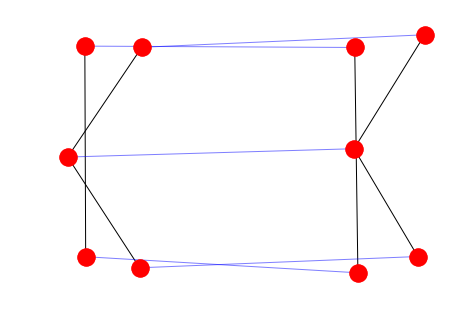

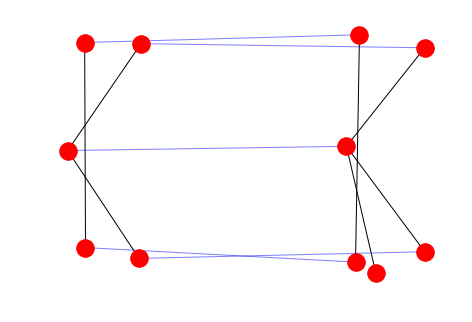

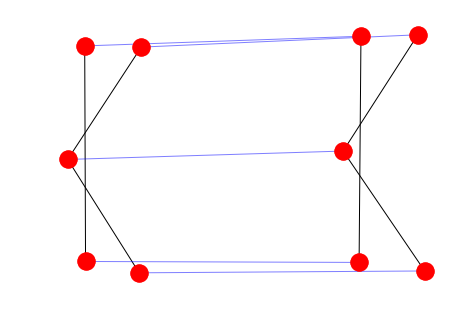

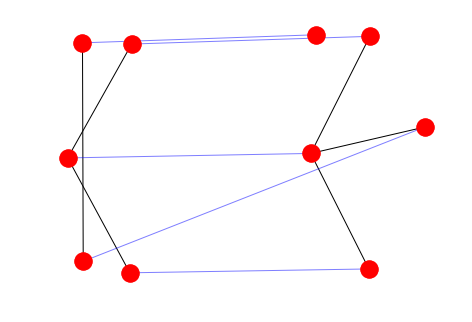

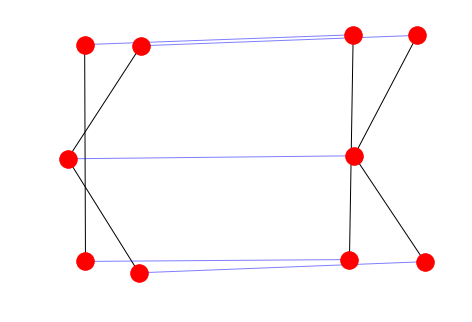

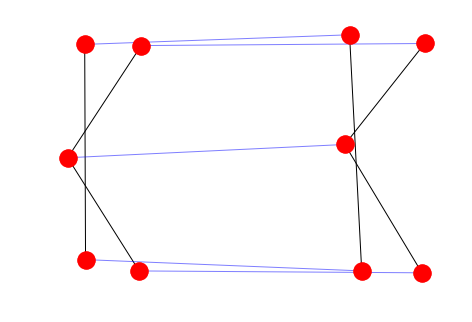

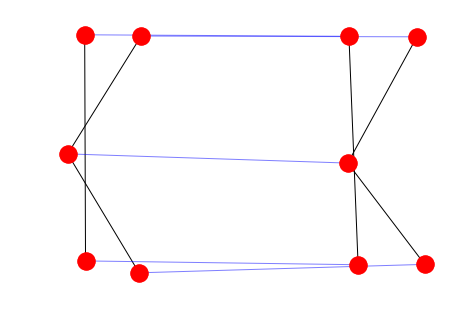

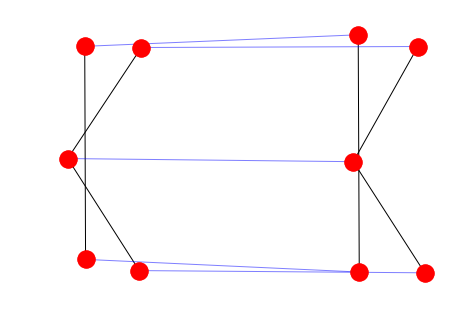

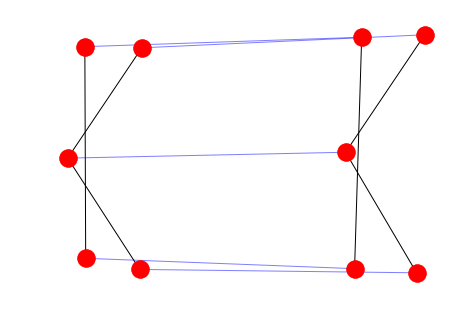

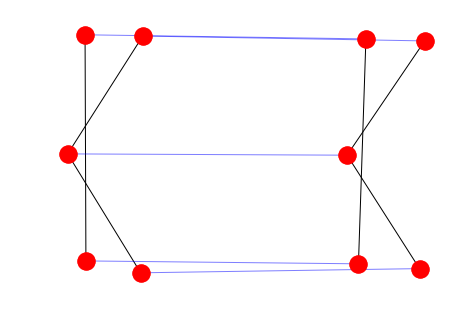

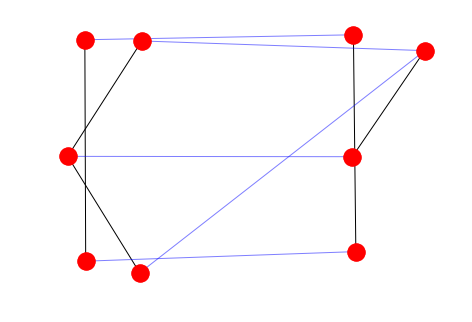

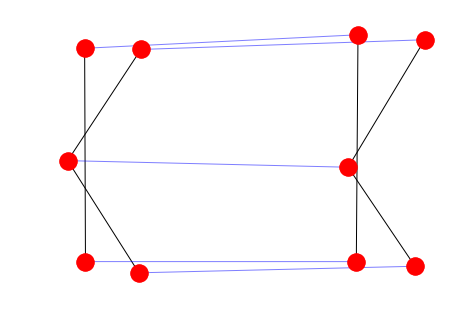

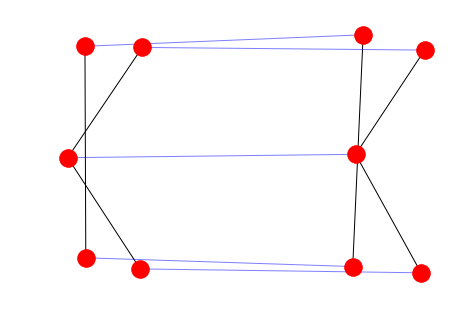

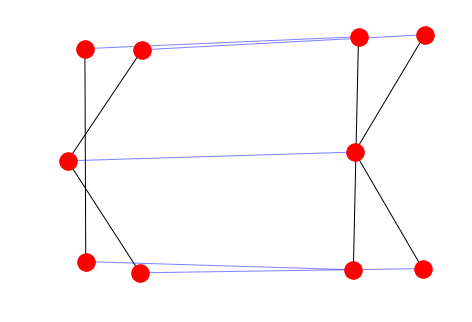

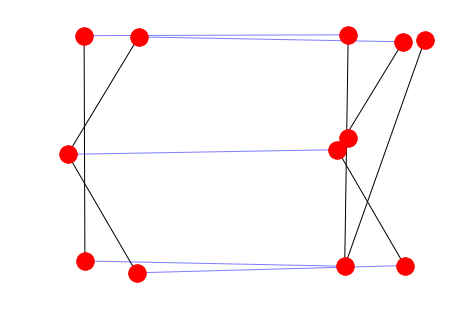

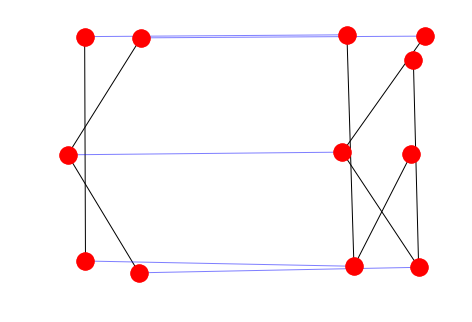

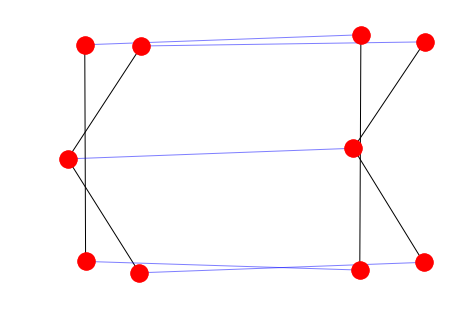

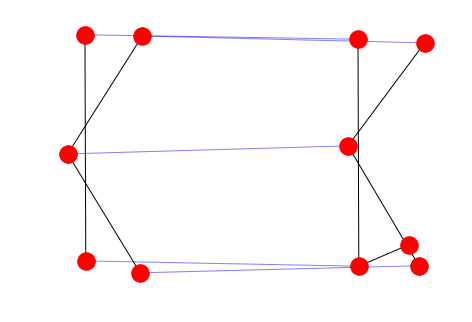

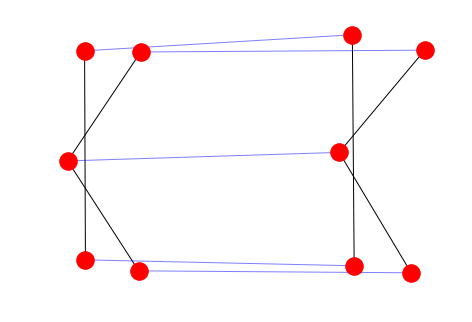

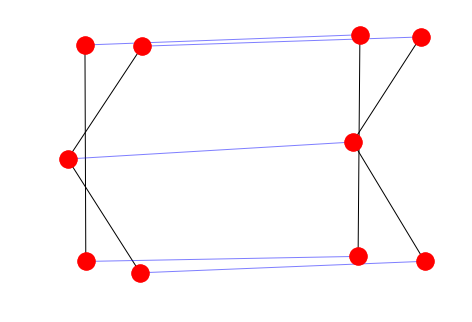

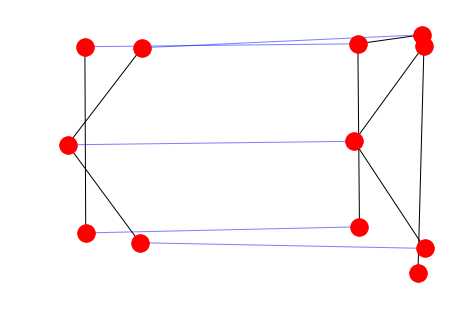

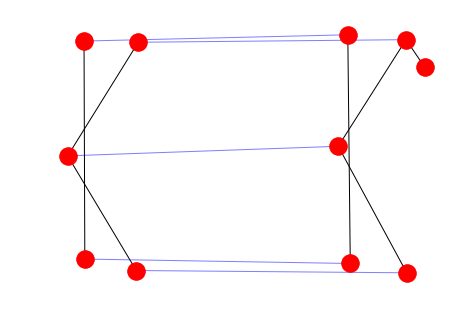

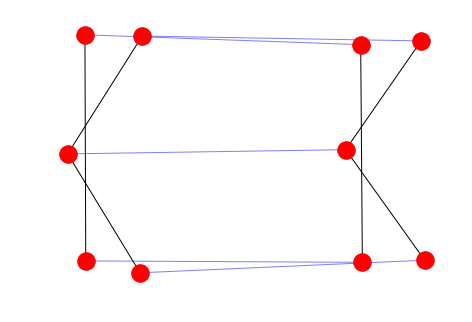

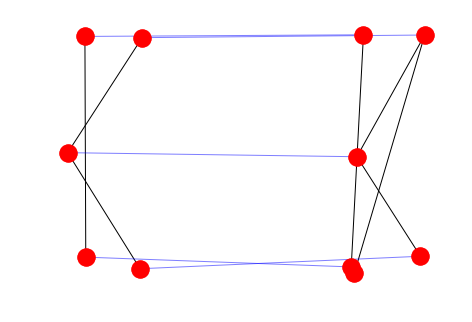

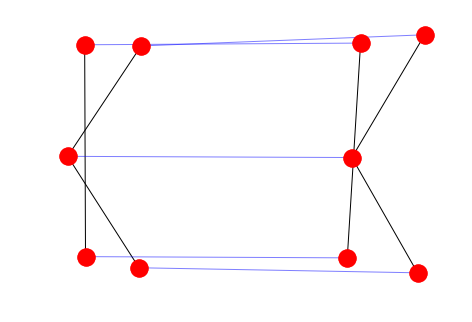

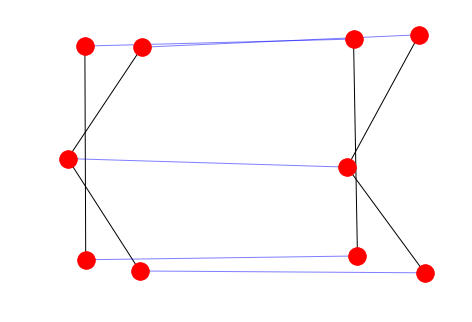

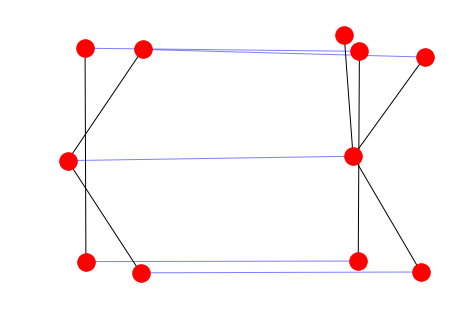

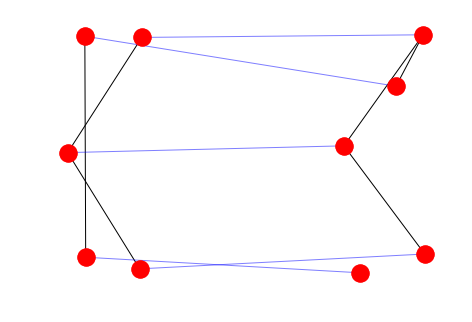

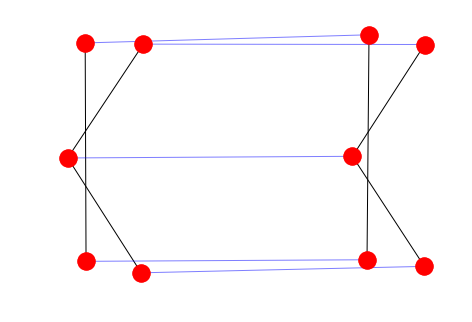

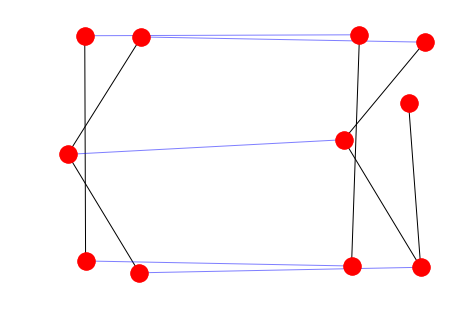

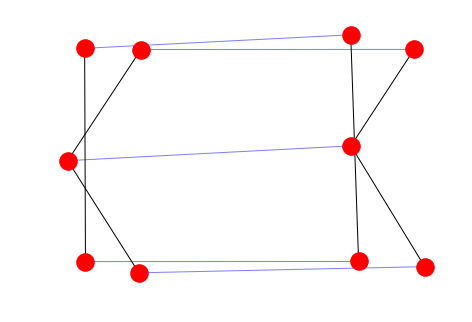

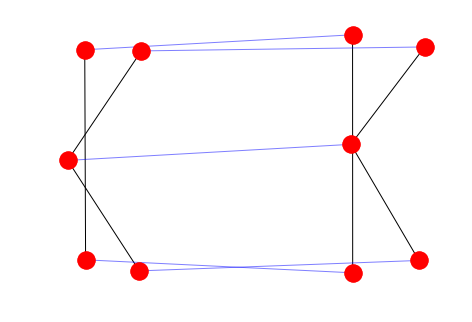

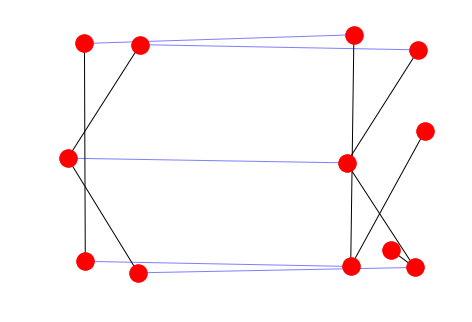

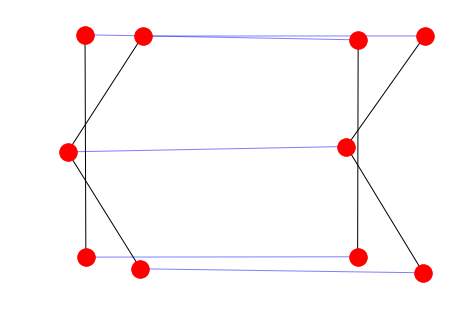

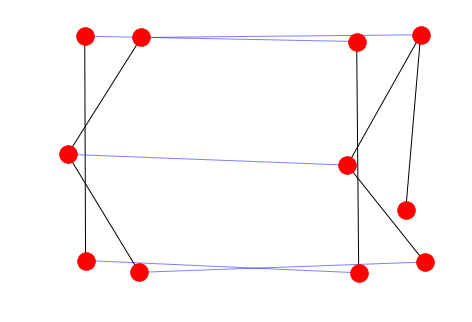

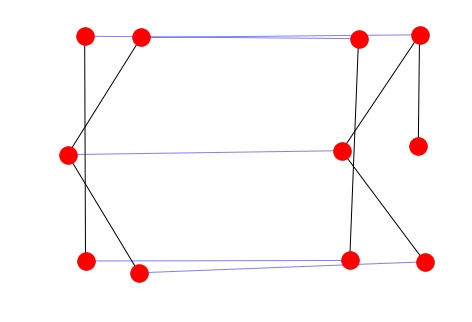

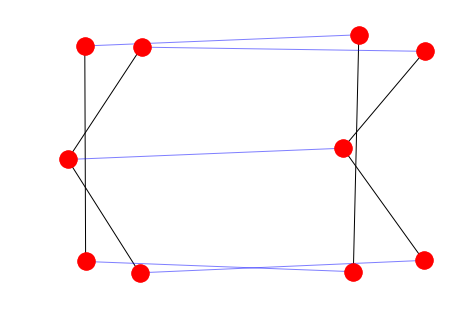

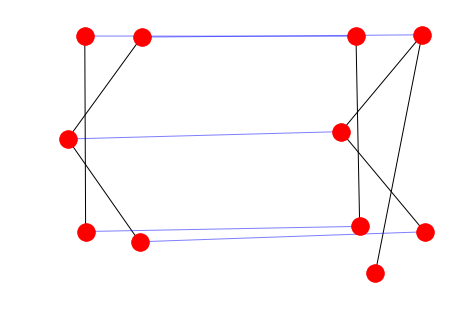

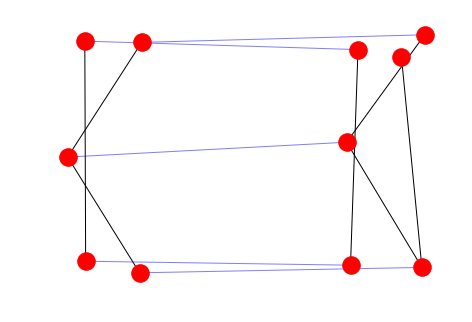

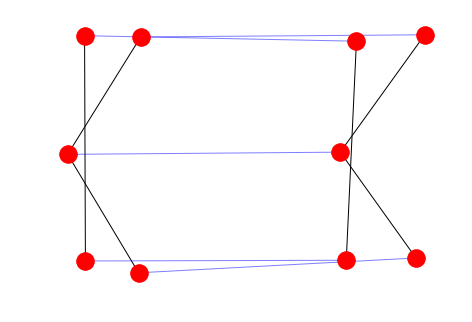

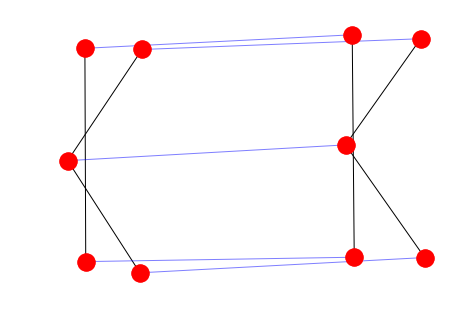

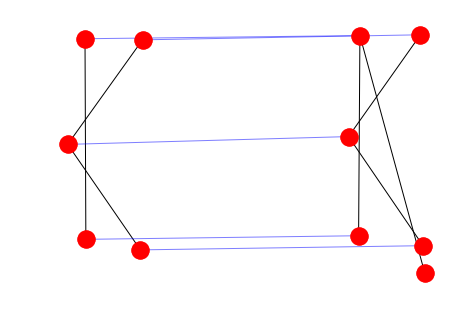

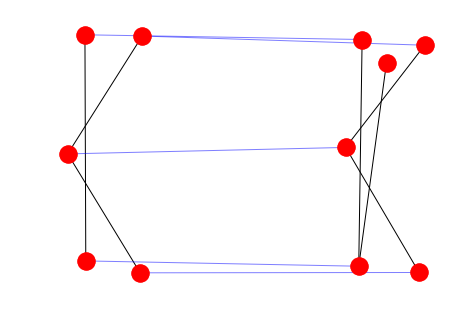

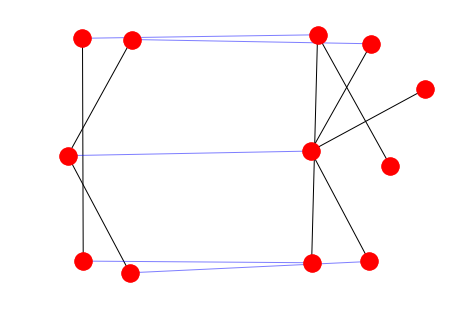

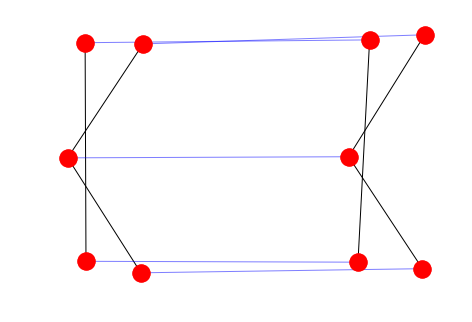

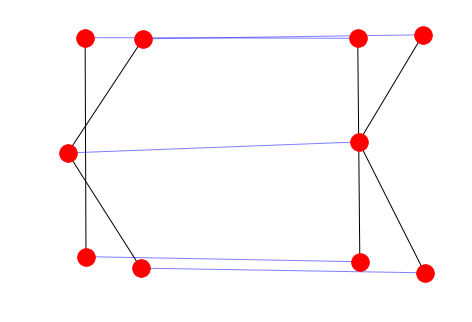

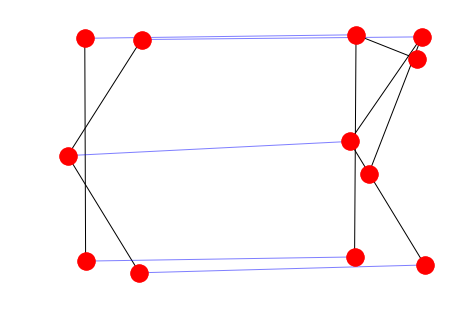

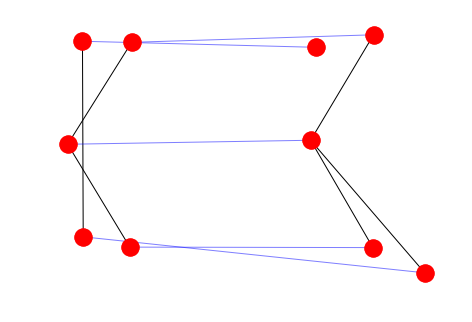

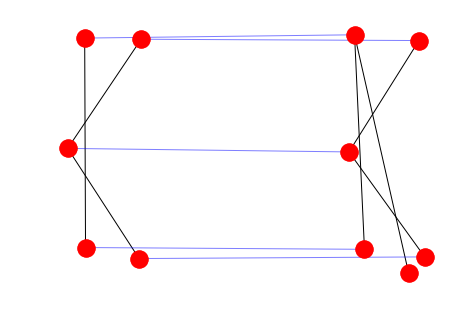

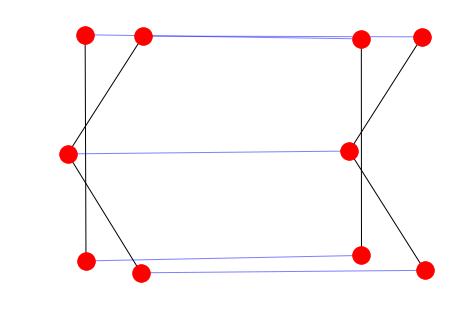

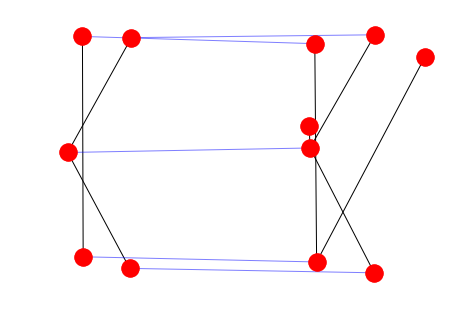

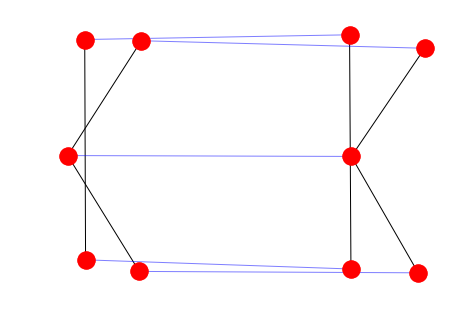

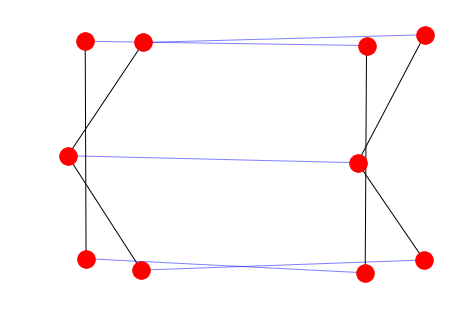

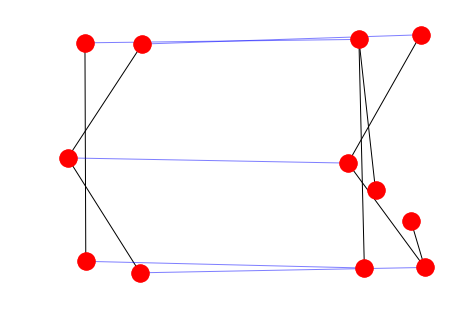

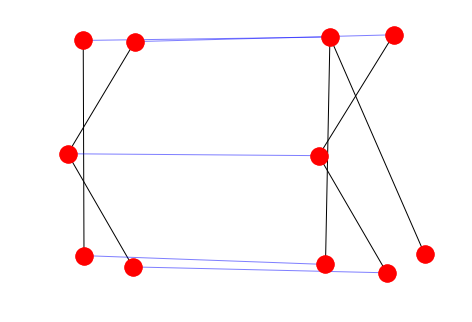

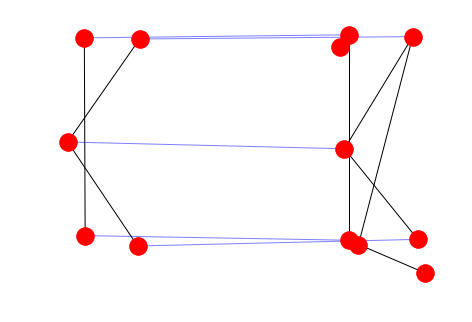

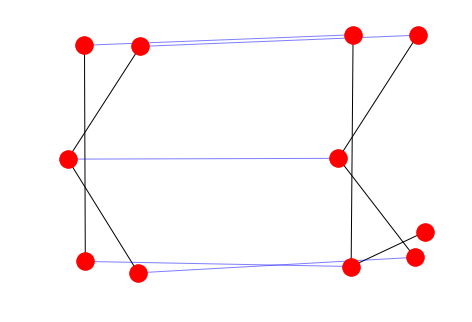

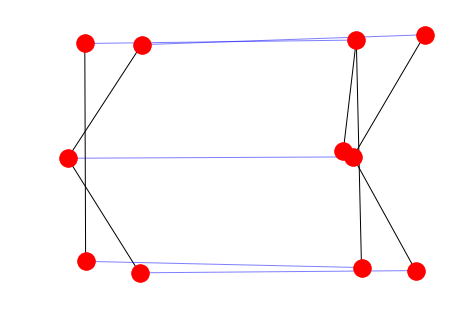

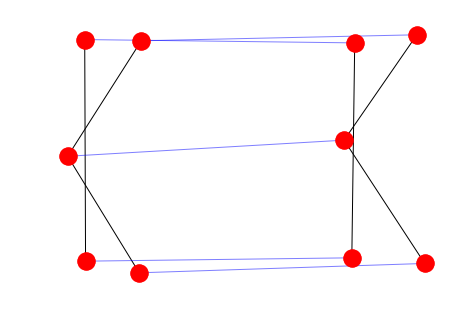

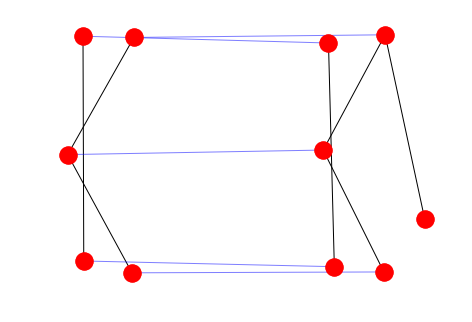

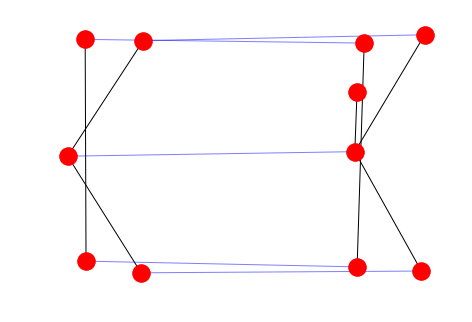

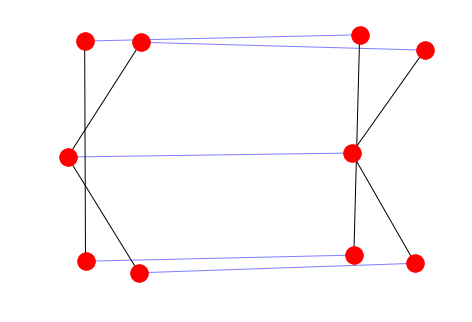

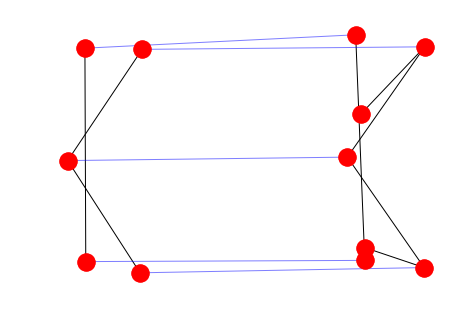

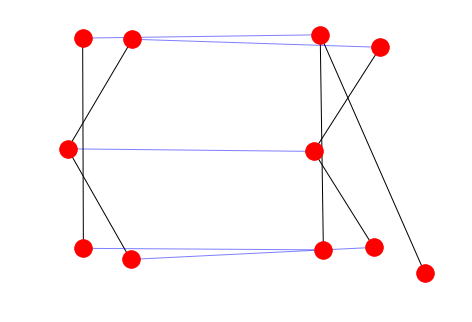

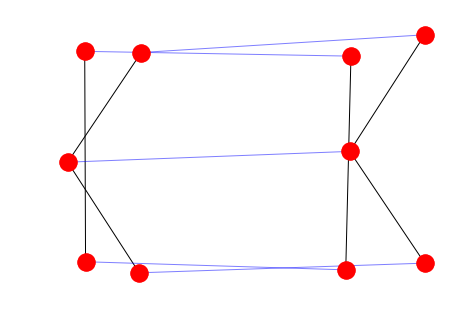

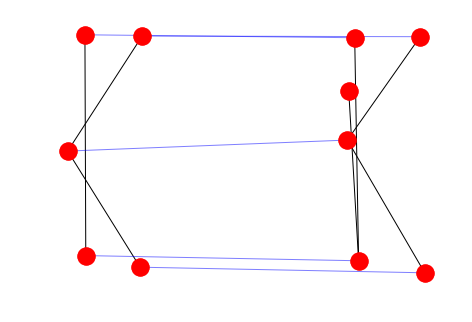

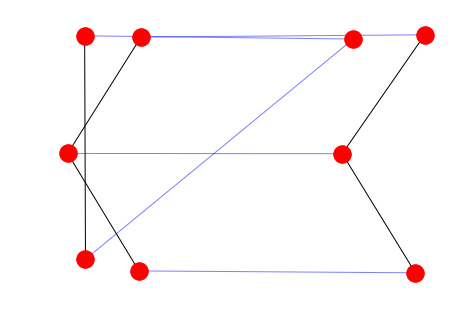

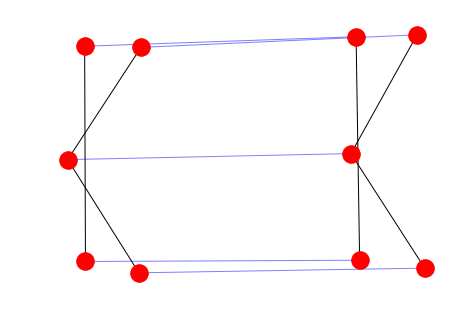

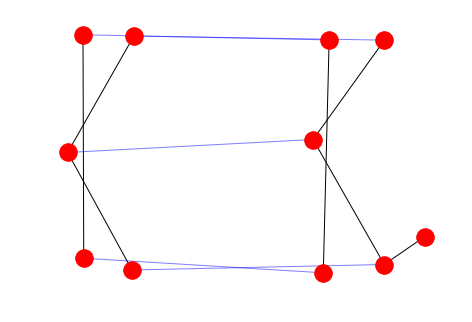

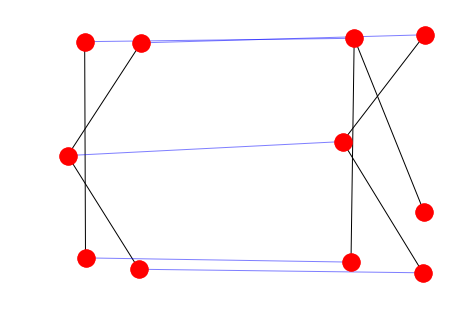

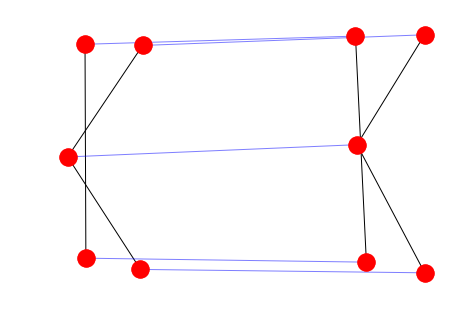

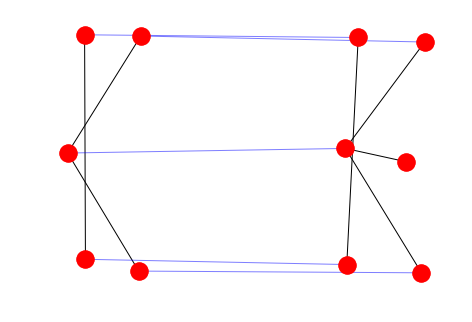

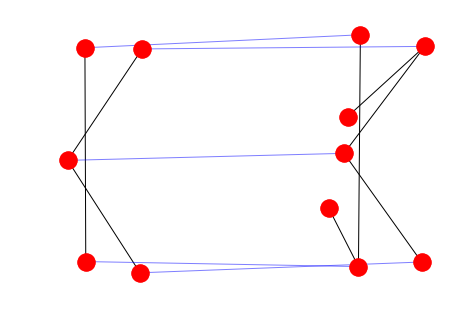

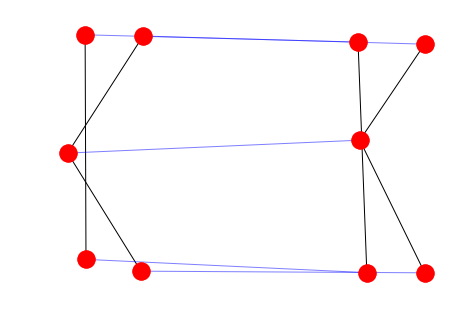

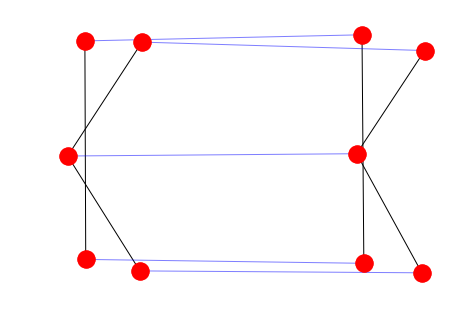

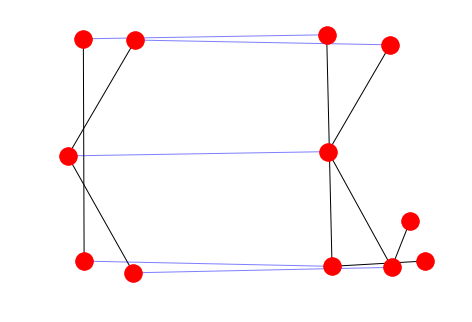

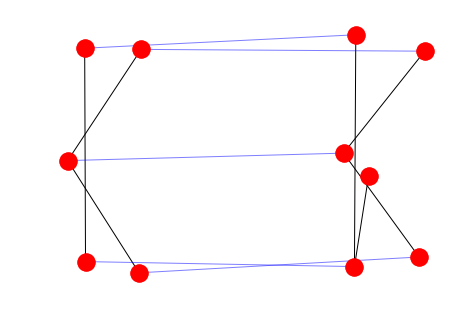

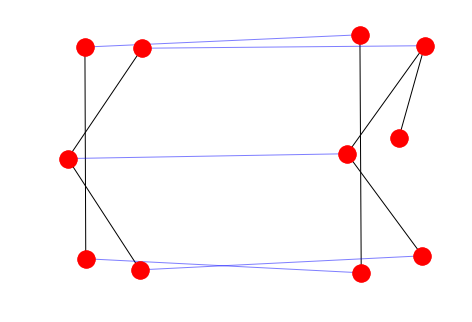

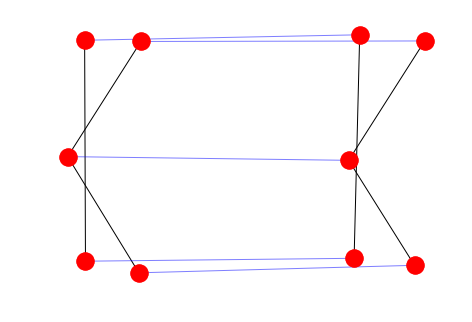

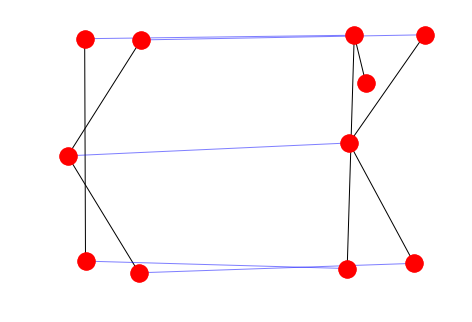

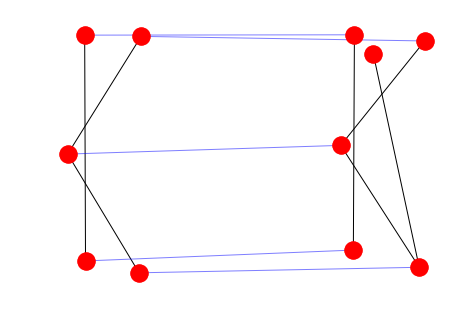

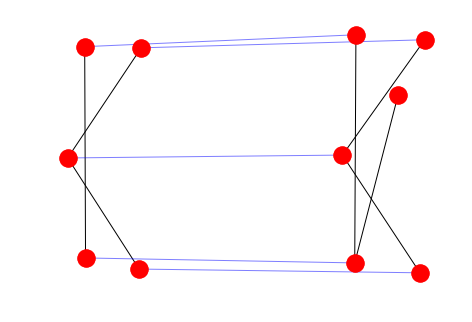

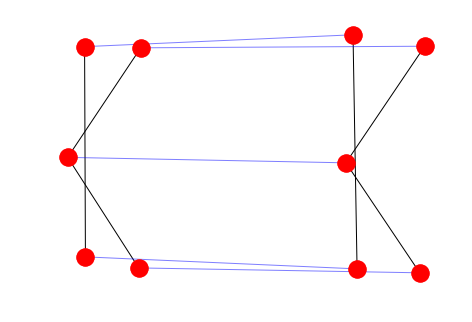

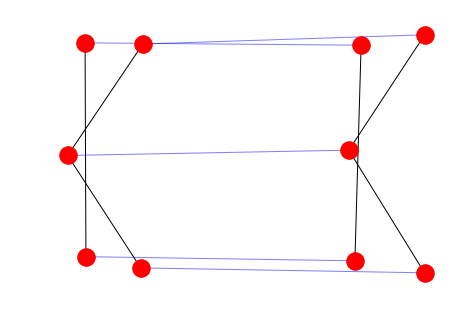

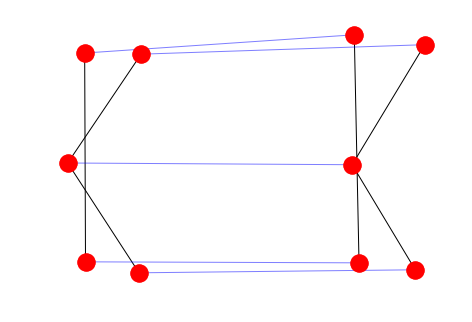

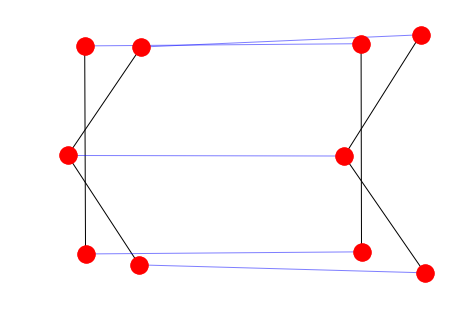

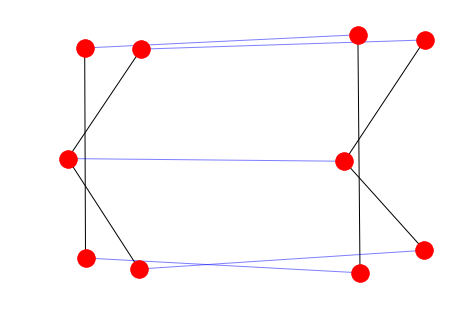

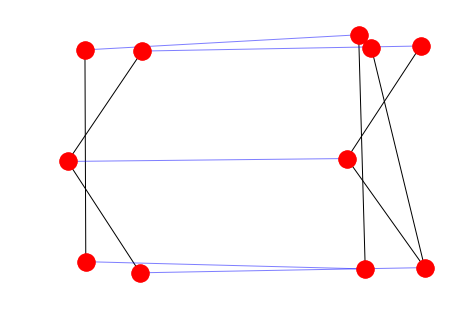

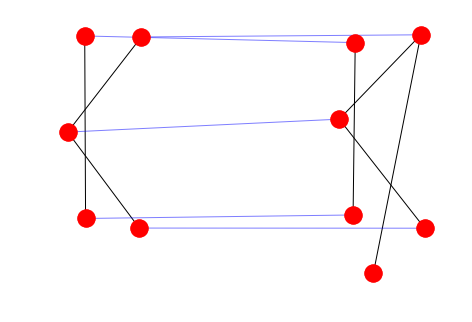

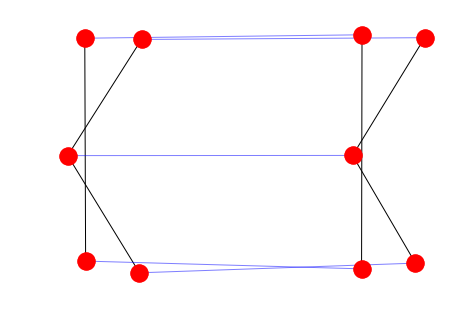

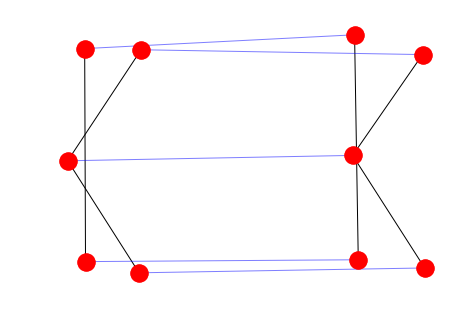

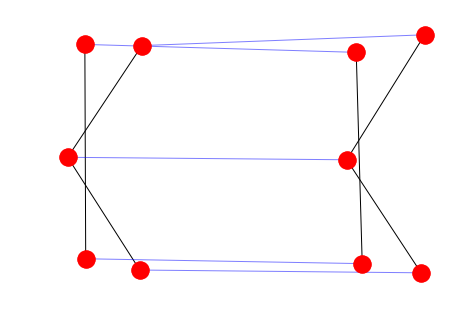

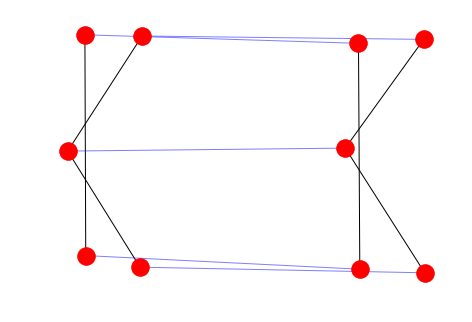

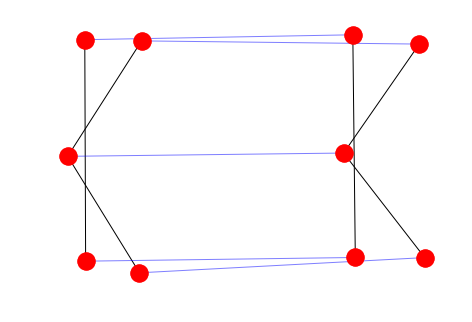

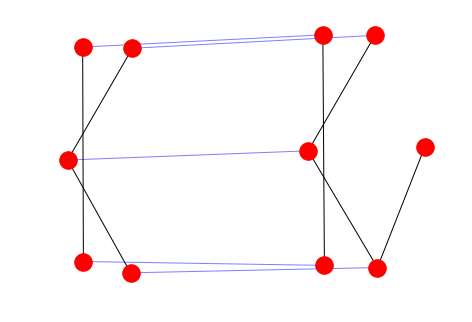

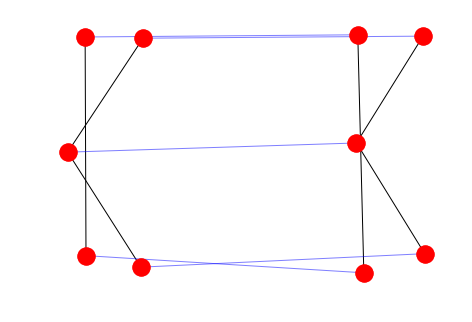

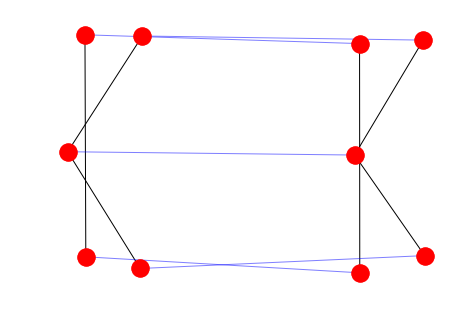

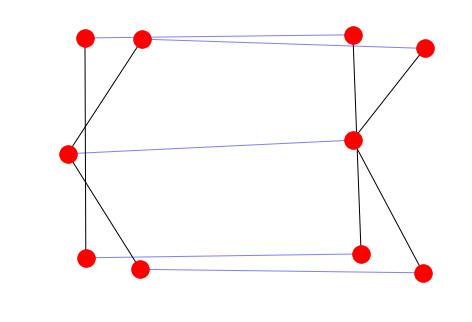

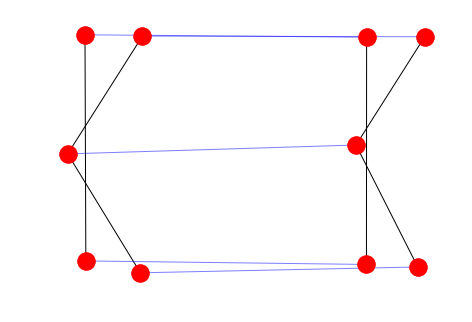

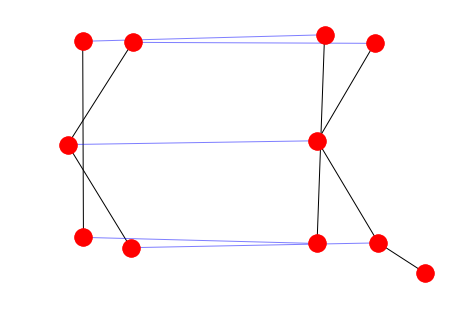

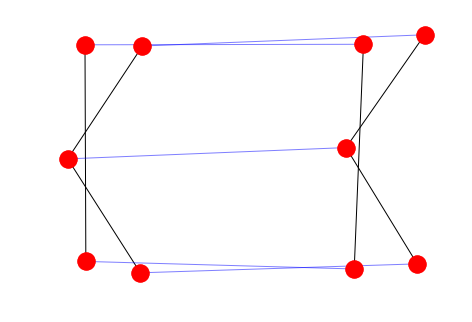

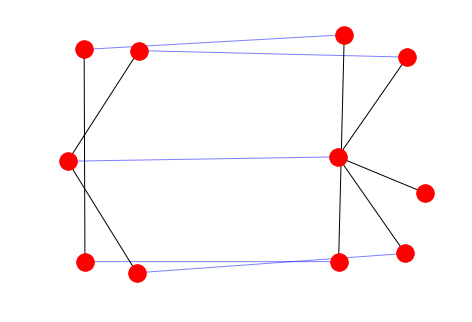

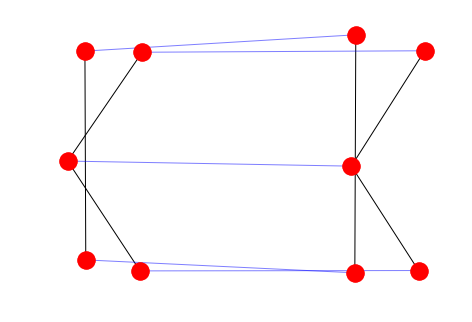

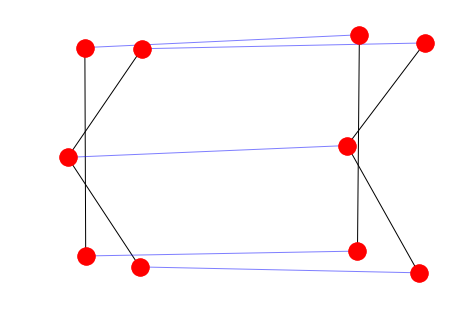

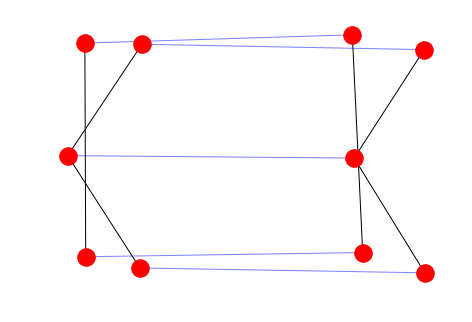

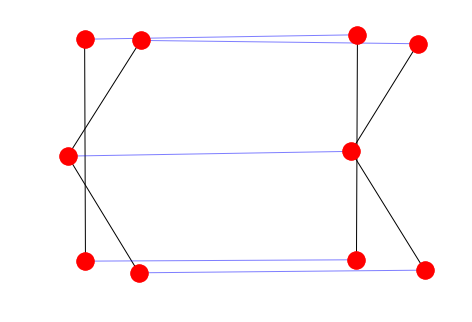

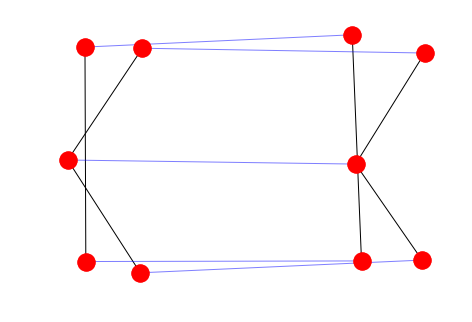

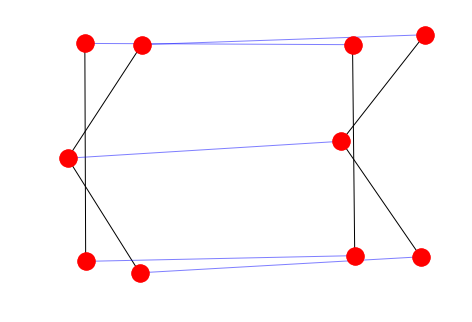

In [31]:
# Select distortion [LOW, MED, HIGH]
distortion = 'LOW'

# Select letter [A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z]
letter = 'K'

# Select id [0-149]
id=0



# Read the graph and draw it using networkx tools
G1 = read_letters(os.path.join('Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
G1nodesFeatures,G1adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G1)

for j in range(149):
    G2 = read_letters(os.path.join('Letter', distortion, letter+'P1_'+ str(j).zfill(4) +'.gxl'))
    G2nodesFeatures,G2adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G2)
    K=BuildKv2(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency)
    
    N=100
    n1=G1nodesFeatures.shape[0]
    n2=G2nodesFeatures.shape[0]
    y,Y=GraphMatchingPowerIteration(K,n1,n2,N)
    N=10
    M=SinkhornKnopp(Y,N)
    bestmatch = M.argmax(axis=1)
    
    G1G2=nx.disjoint_union(G1,G2)
    for i in range(n1,G1G2.number_of_nodes()):
        G1G2.node[i]['position']=[G1G2.node[i]['position'][0]+5,G1G2.node[i]['position'][1]]
    edgelista=[]
    for i in range(n1):
        k=bestmatch[i]
        edgelista.append((i, k+n1))

        
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,
                           width=1, alpha=0.5, edge_color='b')
    
    
    plt.savefig('./image ('+str(j)+') res.png')
    plt.show()
        

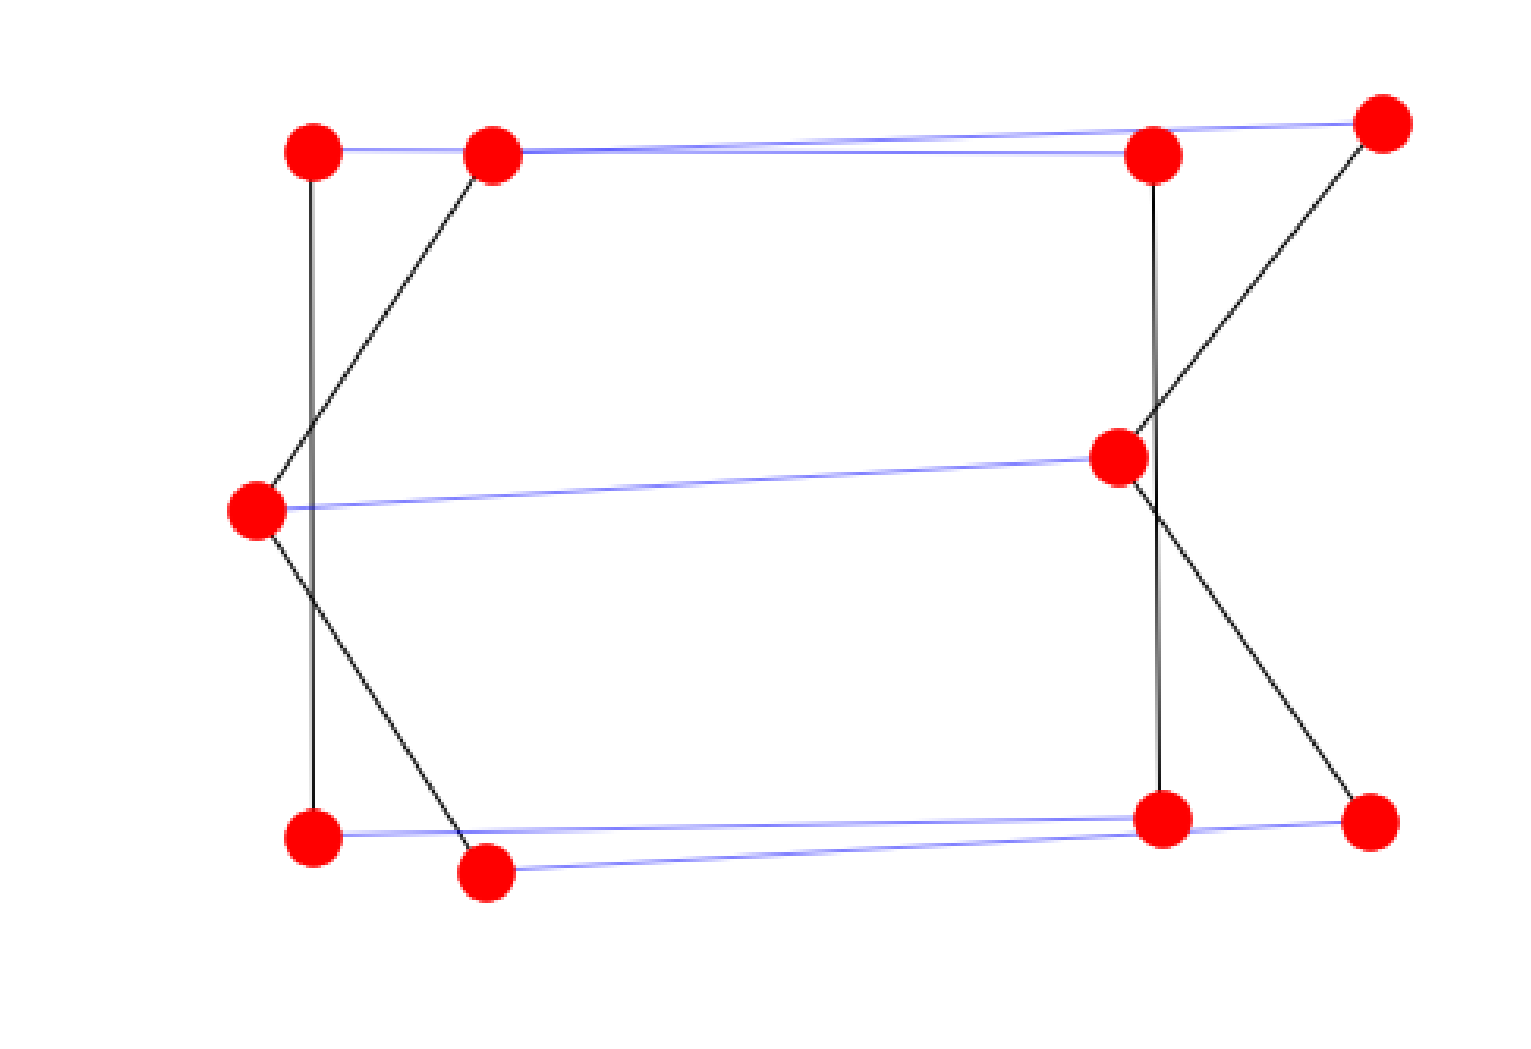

In [28]:
listimages=[]
fig = plt.figure(dpi=300) # just for display
ax = fig.subplots()
ax.axis('off')
for j in range(149):
    #ax.set_title('Graph 0 and Graph : %d' % j)
    im=plt.imread('./image ('+str(j)+') res.png')
    imdata=plt.imshow(im)
    listimages.append([imdata])


In [29]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(fig, listimages, interval=1000, blit=True,
                                repeat_delay=1000)


ani.save('GraphMachingLetterK.mp4')

plt.show()
HTML(ani.to_html5_video())